2023.06.05

# **以基本面預測建立最佳投資組合**

# 預測目標: 股價數值
* 樣本為 2330 台積電、2303 聯電、2353 宏碁、8046 南電、2880 華南金、2881 富邦金、3045 台灣大、2357 華碩、6547 高端疫苗、1789 神隆 十間公司
* 預測時間點: 2023-06 之股價
* X 為綜合財報會計科目，Y 為 股價 
* 以前一季的綜合財報資訊預測第 t 期的股價



執行環境：Google Colab


---


### **目錄**

基本面股價預測
0. Setup
1. 讀取資料集、資料清理
2. 取得訓練資料和測試資料集參數調整
3. 模型訓練、預測及成效

基本面投資決策

1. Regression 模型預測結果之投資組合
2. XGBoost 模型預測結果之投資組合


# 基本面股價預測

## **0. Setup**

In [ ]:
# Connect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# 匯入所需套件
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Project Path 

< 需修改檔案路徑 >

In [ ]:
project_path = file_path = '/content/gdrive/MyDrive/Colab Notebooks/PyML/Project_Fundamental'

## **1. 讀取資料集**

【**股價 (2013-2023)**】

資料期間：2013年1月至2023年5月 

資料範圍：2330 台積電、2303 聯電、2353 宏碁、8046 南電、2880 華南金、2881 富邦金、3045 台灣大、2357 華碩、6547 高端疫苗、1789 神隆

資料來源：TEJ Company DB


In [ ]:
# 匯入股價資料
org_stockprice = pd.read_excel(os.path.join(project_path, 'TEJ_股價_0522_2013-2023.xlsx'), index_col=0) 

org_stockprice

,日期,近一月最高收盤價(元),近三月最高收盤價(元),近六月最高收盤價(元),近九月最高收盤價(元),近一年最高收盤價(元),近一月最低收盤價(元),近三月最低收盤價(元),近六月最低收盤價(元),近九月最低收盤價(元),...,未調整收盤價(元),當日均價(元),3日均價(元),5日均價(元),10日均價(元),13日均價(元),15日均價(元),20日均價(元),25日均價(元),26日均價(元)
證券代碼,,,,,,,,,,,,,,,,,,,,,
2330 台積電,2023/05/23,532.0000,539.0000,542.0668,542.0668,547.6506,491.5000,491.5000,443.5996,366.8915,...,530.00,528.5661,531.0000,528.4000,514.0500,511.8846,509.9000,506.7250,507.6200,508.0962
2303 聯電,2023/05/23,50.2000,53.5000,53.5000,53.5000,53.5000,48.1000,48.1000,40.7000,35.3500,...,48.90,48.9555,49.2667,49.4500,49.1500,49.3115,49.3767,49.2675,49.5620,49.6558
2353 宏碁,2023/05/23,30.9500,30.9500,30.9500,30.9500,30.9500,28.2000,25.3500,22.7000,20.7500,...,30.75,30.75,30.8000,30.5100,30.1100,29.8077,29.9067,29.8775,29.8260,29.8096
8046 南電,2023/05/23,293.0000,293.0000,310.5000,310.5000,381.3559,258.0000,235.0000,219.5000,178.0000,...,289.00,286.0989,287.8333,287.1000,285.2500,284.5000,283.1333,279.6250,275.7200,275.2885
2880 華南金,2023/05/23,22.9500,23.0500,23.5000,23.5000,23.6000,21.8500,21.4500,21.4500,20.3000,...,22.65,22.6354,22.6833,22.5900,22.3200,22.2500,22.2033,22.2700,22.3720,22.3846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880 華南金,2013/01/02,8.7545,8.7545,8.7545,8.7545,8.7545,8.3672,7.8248,7.8045,7.4465,...,16.95,16.9083,8.6770,8.6202,8.5712,8.5817,8.5841,8.5634,8.5355,8.5271
2881 富邦金,2013/01/02,24.9787,24.9787,24.9787,24.9787,24.9787,23.5198,21.3493,19.8588,18.2176,...,35.10,35.2219,24.7771,24.5802,24.3346,24.2616,24.2362,24.0945,23.9397,23.9030
3045 台灣大,2013/01/02,71.9726,80.3400,80.3400,80.3400,80.3400,68.6251,69.1600,65.9500,58.6400,...,105.00,104.7119,73.9400,73.4300,72.9700,73.1700,73.2900,73.6300,73.4400,73.4400


In [ ]:
# 看股價資訊資料大小
print("Data shape:", org_stockprice.shape)
print("Data size:", org_stockprice.size)

Data shape: (24096, 21)
Data size: 506016


In [ ]:
# 複製 dataset 來進行資料清理
stockprice = org_stockprice.copy()

In [ ]:
# 新增 "Date" 欄放 Datetime 類型日期
stockprice['Date'] = pd.to_datetime(stockprice['日期'])

# 新增一個欄位 month，代表月份
stockprice['month'] = stockprice['Date'].dt.month


# 新增一個名為 'Year-Month' 的 column，用來存放年月資訊
stockprice['Year-Month'] = stockprice['Date'].dt.strftime('%Y-%m')

# 刪除不必要的 'Date' 欄位
stockprice.drop(columns=['Date'], inplace=True)

In [ ]:
# 將不需要用到的欄位刪除
stockprice = stockprice[['Year-Month','month','15日均價(元)']]
stockprice

,Year-Month,month,15日均價(元)
證券代碼,,,
2330 台積電,2023-05,5,509.9000
2303 聯電,2023-05,5,49.3767
2353 宏碁,2023-05,5,29.9067
8046 南電,2023-05,5,283.1333
2880 華南金,2023-05,5,22.2033
...,...,...,...
2880 華南金,2013-01,1,8.5841
2881 富邦金,2013-01,1,24.2362
3045 台灣大,2013-01,1,73.2900


In [ ]:
# 只保留各年度 3、6、9、12月份資料

# 選擇需要的月份，這裡選擇 3, 6, 9, 12 月
month_list = [3, 6, 9, 12]
filtered_stockprice = stockprice[stockprice['month'].isin(month_list)]

# 刪除不需要的欄位
filtered_stockprice = filtered_stockprice.drop(columns=['month'])

# 顯示結果
filtered_stockprice.head(20)

,Year-Month,15日均價(元)
證券代碼,,
2330 台積電,2023-03,522.9819
2303 聯電,2023-03,52.5133
2353 宏碁,2023-03,27.2233
8046 南電,2023-03,271.6333
2880 華南金,2023-03,22.0200
2881 富邦金,2023-03,56.2533
3045 台灣大,2023-03,99.3933
2357 華碩,2023-03,268.0000
6547 高端疫苗,2023-03,57.4733


In [ ]:
# 按照證券代碼和年月進行分組，並計算每個組的均價
stockprice_grouped = filtered_stockprice.groupby(['證券代碼', 'Year-Month']).mean()

stockprice_grouped = stockprice_grouped.reset_index().sort_values(['Year-Month', '證券代碼'])


# 輸出結果
stockprice_grouped.head(20)

,證券代碼,Year-Month,15日均價(元)
0,1789 神隆,2013-03,53.859776
41,2303 聯電,2013-03,8.577143
82,2330 台積電,2013-03,79.110914
123,2353 宏碁,2013-03,21.695310
164,2357 華碩,2013-03,213.130014
205,2880 華南金,2013-03,8.928957
246,2881 富邦金,2013-03,29.185048
287,3045 台灣大,2013-03,72.486667
348,8046 南電,2013-03,29.643810
1,1789 神隆,2013-06,52.862689


In [ ]:
# 為了後續合併股價和綜合財報資訊，修改欄位名稱
# Align the column names
stockprice_grouped = stockprice_grouped.reset_index()
stockprice_grouped = stockprice_grouped.rename_axis(None, axis=1)
# Change column names
stockprice_grouped = stockprice_grouped.rename(columns={'證券代碼': '公司'})



【**綜合財報 (2020.06-2022.12)**】

資料期間：2020年6月至2022年12月      !!!!! TBC !!!!!

資料範圍：2330 台積電、2303 聯電、2353 宏碁、2458 義隆、5880 合庫金、2885 元大金、3045 台灣大、2357 華碩、6547 高端疫苗、2354 鴻準 

資料來源：TEJ Company DB

In [ ]:
# 匯入綜合財報資料
org_FR = pd.read_excel(os.path.join(project_path, 'TEJ_財報_0522_2013-2023.xlsx'), index_col=0) 
org_FR

,年/月,季別,合併(Y/N),月份,幣別,現金及約當現金,透過損益按公允價值衡量之金融資產－流動,透過其他綜合損益按公允價值衡量之金融資產－流動,按攤銷後成本衡量之金融資產－流動,避險之金融資產－流動,...,淨值週轉率（次）,應付帳款付現天數,淨營業週期（日）,季底收款天數,季底售貨天數,自由現金流量(D),季底應收帳款/營收TSE,季底存貨/營收TSE,營運槓桿度,財務槓桿度
公司,,,,,,,,,,,,,,,,,,,,,
2330 台積電,2023/03,1,Y,3,NTD,1385232810,982014,129541034,73428595,70,...,0.67,21.28,102.21,23.69,86.58,805376,7.28,10.62,-,-
2303 聯電,2023/03,1,Y,3,NTD,171834458,751386,4394403,259264,0,...,0.63,23.66,113,37.11,78.64,4255778,12.48,15.07,-,-
2353 宏碁,2023/03,1,Y,3,NTD,41541239,958159,0,0,0,...,3.03,60.63,106.45,74.67,65,5866967,23.97,18.8,-,-
8046 南電,2023/03,1,Y,3,NTD,23253565,0,29284,0,0,...,1.02,54.3,96.67,64.29,50.59,11385864,21.93,10.6,-,-
3045 台灣大,2023/03,1,Y,3,NTD,14260578,0,260610,0,0,...,2.31,34.79,3.71,39.64,20.33,1245970,4.78,4.59,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880 華南金,2013/03,1,Y,3,NTD,34819261,46471733,-,318537488,-,...,-,-,-,-,-,-,-,-,-,-
2881 富邦金,2013/03,1,Y,3,NTD,142046897,113506393,-,572781641,-,...,-,-,-,-,-,-,-,-,-,-
3045 台灣大,2013/03,1,Y,3,NTD,6076085,0,201702,0,0,...,1.77,36.81,21.4,56.82,20.15,627673,11.47,3.3,-,-


In [ ]:
# 複製 dataset 來進行資料清理
FR = org_FR.copy()

In [ ]:
FR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 2330 台積電 to 1789 神隆
Columns: 174 entries, 年/月 to 財務槓桿度
dtypes: float64(23), int64(51), object(100)
memory usage: 546.9+ KB


In [ ]:
# 刪除所有值都為 0 的 columns
FR = FR.loc[:, (FR != 0).any(axis=0)]

# 列印刪除後的 DataFrame
FR

,年/月,季別,合併(Y/N),月份,幣別,現金及約當現金,透過損益按公允價值衡量之金融資產－流動,透過其他綜合損益按公允價值衡量之金融資產－流動,按攤銷後成本衡量之金融資產－流動,避險之金融資產－流動,...,淨值週轉率（次）,應付帳款付現天數,淨營業週期（日）,季底收款天數,季底售貨天數,自由現金流量(D),季底應收帳款/營收TSE,季底存貨/營收TSE,營運槓桿度,財務槓桿度
公司,,,,,,,,,,,,,,,,,,,,,
2330 台積電,2023/03,1,Y,3,NTD,1385232810,982014,129541034,73428595,70,...,0.67,21.28,102.21,23.69,86.58,805376,7.28,10.62,-,-
2303 聯電,2023/03,1,Y,3,NTD,171834458,751386,4394403,259264,0,...,0.63,23.66,113,37.11,78.64,4255778,12.48,15.07,-,-
2353 宏碁,2023/03,1,Y,3,NTD,41541239,958159,0,0,0,...,3.03,60.63,106.45,74.67,65,5866967,23.97,18.8,-,-
8046 南電,2023/03,1,Y,3,NTD,23253565,0,29284,0,0,...,1.02,54.3,96.67,64.29,50.59,11385864,21.93,10.6,-,-
3045 台灣大,2023/03,1,Y,3,NTD,14260578,0,260610,0,0,...,2.31,34.79,3.71,39.64,20.33,1245970,4.78,4.59,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880 華南金,2013/03,1,Y,3,NTD,34819261,46471733,-,318537488,-,...,-,-,-,-,-,-,-,-,-,-
2881 富邦金,2013/03,1,Y,3,NTD,142046897,113506393,-,572781641,-,...,-,-,-,-,-,-,-,-,-,-
3045 台灣大,2013/03,1,Y,3,NTD,6076085,0,201702,0,0,...,1.77,36.81,21.4,56.82,20.15,627673,11.47,3.3,-,-


In [ ]:
# 缺失值處理  
# 將每個 column 的缺失值統計出來，並把缺十值占比超過 40% 的 columns 刪掉
FR1 = FR.iloc[:, 5:]
count = FR1.apply(lambda column: column.astype(str).str.count('-').sum())

to_drop = []
for i in range(len(count)):
    if count[i] / FR1.iloc[:, i].count() >= 0.4:
        to_drop.append(FR1.columns[i])

FR = FR.drop(to_drop, axis=1)

In [ ]:
# 把型態為 object 的 columns 刪除
# 選擇 dtype 是 float 或 int 的 columns，並保留"年/月"
FR = FR.select_dtypes(include=['float', 'int']).assign(**{'年/月': FR['年/月']})
FR

,季別,月份,現金及約當現金,透過損益按公允價值衡量之金融資產－流動,按攤銷後成本衡量之金融資產－流動,應收帳款及票據,其他應收款,待出售非流動資產,當期所得稅資產－流動,透過其他綜合損益按公允價值衡量之金融資產－非流動,...,每股營業額,每股稅前淨利,每股綜合損益,利息支出率,總負債/總淨值,負債比率,淨值/資產,長短期借款,稅前純益 /實收資本,年/月
公司,,,,,,,,,,,,,,,,,,,,,
2330 台積電,1,3,1385232810,982014,73428595,148047679,76608,0,0,6918090,...,19.61,9.42,7.85,1.42,63.14,38.70,61.30,862825149,94.20,2023/03
2303 聯電,1,3,171834458,751386,259264,27065028,1838971,0,65094,13869030,...,4.34,1.55,1.60,2.08,54.59,35.31,64.69,47077380,15.30,2023/03
2353 宏碁,1,3,41541239,958159,0,50290381,659391,0,294575,9084408,...,17.48,0.31,0.64,8.54,176.08,63.78,36.22,11672420,3.09,2023/03
8046 南電,1,3,23253565,0,0,11037346,419940,0,0,0,...,19.47,4.87,3.75,0.22,89.19,47.14,52.86,0,48.72,2023/03
3045 台灣大,1,3,14260578,0,0,8228133,2910491,0,0,4875928,...,15.25,1.44,1.16,6.79,151.50,60.24,39.76,69581779,11.54,2023/03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880 華南金,1,3,34819261,46471733,318537488,5751487,41768707,0,1960059,78468570,...,0.98,0.36,0.35,57.25,1469.10,93.63,6.37,77450028,3.59,2013/03
2881 富邦金,1,3,142046897,113506393,572781641,13795583,92445339,0,1732541,1509681560,...,8.41,1.29,-0.12,26.60,1286.89,92.79,7.21,113053161,12.90,2013/03
3045 台灣大,1,3,6076085,0,0,12097455,926262,0,0,1283271,...,9.80,1.78,1.49,2.00,69.23,40.91,59.09,16411194,13.98,2013/03


In [ ]:
# 新增'Year-Month'欄位
FR['Year-Month'] = pd.to_datetime(FR['年/月']) 
FR['Year-Month'] = FR['Year-Month'].dt.strftime('%Y-%m')
FR
# 刪除'年/月'、'季別'、'月份'欄位
FR = FR.drop(['年/月','季別','月份'], axis=1)

In [ ]:
# Align the column names
FR = FR.reset_index()
FR = FR.rename_axis(None, axis=1)

In [ ]:
# 將股價資料與財報資訊合併 (根據公司名稱和 Year-Month)
df_merged = pd.merge(stockprice_grouped, FR, on=['公司', 'Year-Month']) 
df_merged

,index,公司,Year-Month,15日均價(元),現金及約當現金,透過損益按公允價值衡量之金融資產－流動,按攤銷後成本衡量之金融資產－流動,應收帳款及票據,其他應收款,待出售非流動資產,...,每股現金流量,每股營業額,每股稅前淨利,每股綜合損益,利息支出率,總負債/總淨值,負債比率,淨值/資產,長短期借款,稅前純益 /實收資本
0,0,1789 神隆,2013-03,53.859776,3411045,0,0,599227,114606,0,...,0.78,1.75,0.63,0.60,0.40,16.65,14.28,85.72,391668,6.27
1,41,2303 聯電,2013-03,8.577143,50582501,641881,0,17436455,706679,0,...,0.56,2.23,0.60,0.63,2.48,40.12,28.63,71.37,53172384,5.82
2,82,2330 台積電,2013-03,79.110914,186028798,18206,2044822,65906835,176298,0,...,2.84,5.12,1.76,1.75,1.24,38.12,27.60,72.40,163067985,17.64
3,123,2353 宏碁,2013-03,21.695310,47373516,70481,0,67381156,3258967,0,...,-2.06,33.78,0.17,0.90,28.58,186.12,65.05,34.95,19460318,1.59
4,164,2357 華碩,2013-03,213.130014,50129937,10702719,0,65351624,1489050,0,...,-0.46,153.54,9.61,10.87,0.47,94.77,48.66,51.34,6015332,96.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,163,2353 宏碁,2023-03,26.034783,41541239,958159,0,50290381,659391,0,...,0.25,17.48,0.31,0.64,8.54,176.08,63.78,36.22,11672420,3.09
383,204,2357 華碩,2023-03,276.536239,71482636,1394457,349522,93044368,1788330,0,...,23.41,149.98,-1.92,10.39,-22.72,98.56,49.64,50.36,35188594,-19.24
384,327,3045 台灣大,2023-03,97.744348,14260578,0,0,8228133,2910491,0,...,1.70,15.25,1.44,1.16,6.79,151.50,60.24,39.76,69581779,11.54
385,347,6547 高端疫苗,2023-03,59.771296,1021601,0,3159000,0,6303,0,...,-0.16,0.00,-0.65,-0.71,-4.53,44.99,31.03,68.97,1685259,-6.46


In [ ]:
# 新增 rows 以進行後續 各公司 2023-06 的股價預測 

new_rows = pd.DataFrame({# 根據需求調整索引值
    'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],  
    '公司': ['2330 台積電', '2303 聯電', '2353 宏碁', '8046 南電', '2880 華南金', '2881 富邦金', '3045 台灣大', '2357 華碩', '6547 高端疫苗', '1789 神隆'],  # 公司名稱 
    'Year-Month': ['2023-06'] * 10,  

})
new_rows['Year-Month'] = pd.to_datetime(new_rows['Year-Month']).dt.strftime('%Y-%m')

# 將新資料連接至原始 DataFrame
df_merged = pd.concat([df_merged, new_rows], ignore_index=True)

df_merged['Year-Month'] = pd.to_datetime(df_merged['Year-Month']).dt.strftime('%Y-%m')
df_merged

,index,公司,Year-Month,15日均價(元),現金及約當現金,透過損益按公允價值衡量之金融資產－流動,按攤銷後成本衡量之金融資產－流動,應收帳款及票據,其他應收款,待出售非流動資產,...,每股現金流量,每股營業額,每股稅前淨利,每股綜合損益,利息支出率,總負債/總淨值,負債比率,淨值/資產,長短期借款,稅前純益 /實收資本
0,0,1789 神隆,2013-03,53.859776,3411045.0,0.0,0.0,599227.0,114606.0,0.0,...,0.78,1.75,0.63,0.60,0.40,16.65,14.28,85.72,391668.0,6.27
1,41,2303 聯電,2013-03,8.577143,50582501.0,641881.0,0.0,17436455.0,706679.0,0.0,...,0.56,2.23,0.60,0.63,2.48,40.12,28.63,71.37,53172384.0,5.82
2,82,2330 台積電,2013-03,79.110914,186028798.0,18206.0,2044822.0,65906835.0,176298.0,0.0,...,2.84,5.12,1.76,1.75,1.24,38.12,27.60,72.40,163067985.0,17.64
3,123,2353 宏碁,2013-03,21.695310,47373516.0,70481.0,0.0,67381156.0,3258967.0,0.0,...,-2.06,33.78,0.17,0.90,28.58,186.12,65.05,34.95,19460318.0,1.59
4,164,2357 華碩,2013-03,213.130014,50129937.0,10702719.0,0.0,65351624.0,1489050.0,0.0,...,-0.46,153.54,9.61,10.87,0.47,94.77,48.66,51.34,6015332.0,96.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,5,2881 富邦金,2023-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,6,3045 台灣大,2023-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,7,2357 華碩,2023-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,8,6547 高端疫苗,2023-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 因為需使用前一季的財報來預測下一季的股價，所以將財報資料往後一個 row，移動後 column name 更改為 XXX_shifted

# 將資料按照公司和年月排序
df = df_merged.sort_values(['公司', 'Year-Month']).reset_index(drop=True)


# 對每間公司進行個別的處理
shifted_dataframes = []
for company in df['公司'].unique():
    company_df = df[df['公司'] == company].copy()

    # 將財報數據（X）的每個欄位向後移動一個位置
    num_shifts = 1  # 向後移動的位置數量
    shifted_columns = []
    for column in company_df.columns:
        if column not in ['公司', 'Year-Month', '15日均價(元)']:  # 排除非財報數據和目標值欄位
            shifted_column = column + '_shifted'
            company_df[shifted_column] = company_df[column].shift(num_shifts)
            shifted_columns.append(shifted_column)

    # 移除開頭三個月(每公司第一列)的資料
    company_df = company_df.iloc[1:]


    # 將移動後的財報數據（X_shifted）作為特徵
    X = company_df[shifted_columns]

    # 將公司、年月和15日均價(元)作為目標值
    y = company_df[['公司', 'Year-Month', '15日均價(元)']]

    # 將每間公司的特徵和目標值存儲在一個 DataFrame 中
    company_shifted_df = pd.concat([y, X], axis=1)
    shifted_dataframes.append(company_shifted_df)


# 將所有公司的特徵和目標值合併為一個 DataFrame
final_df = pd.concat(shifted_dataframes, axis=0)
# 刪掉 index_shifted 欄位
final_df = final_df.drop('index_shifted', axis=1)
final_df

,公司,Year-Month,15日均價(元),現金及約當現金_shifted,透過損益按公允價值衡量之金融資產－流動_shifted,按攤銷後成本衡量之金融資產－流動_shifted,應收帳款及票據_shifted,其他應收款_shifted,待出售非流動資產_shifted,當期所得稅資產－流動_shifted,...,每股現金流量_shifted,每股營業額_shifted,每股稅前淨利_shifted,每股綜合損益_shifted,利息支出率_shifted,總負債/總淨值_shifted,負債比率_shifted,淨值/資產_shifted,長短期借款_shifted,稅前純益 /實收資本_shifted
1,1789 神隆,2013-06,52.862689,3411045.0,0.0,0.0,599227.0,114606.0,0.0,0.0,...,0.78,1.75,0.63,0.60,0.40,16.65,14.28,85.72,391668.0,6.27
2,1789 神隆,2013-09,67.732730,3378997.0,0.0,0.0,870455.0,122507.0,0.0,0.0,...,0.70,3.73,1.35,1.26,0.40,28.46,22.16,77.84,755037.0,12.95
3,1789 神隆,2013-12,70.539614,2734079.0,1584.0,0.0,689279.0,154874.0,0.0,0.0,...,1.44,5.57,1.68,1.57,0.52,18.96,15.94,84.06,742832.0,16.80
4,1789 神隆,2014-03,66.457243,2289428.0,0.0,0.0,970871.0,161496.0,0.0,0.0,...,1.39,7.53,2.08,2.00,0.62,19.09,16.03,83.97,689785.0,20.84
5,1789 神隆,2014-06,57.135200,2792770.0,0.0,0.0,629660.0,175443.0,0.0,0.0,...,0.73,1.56,0.27,0.24,2.47,22.65,18.47,81.53,1070158.0,2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,8046 南電,2022-06,357.662810,13299488.0,0.0,0.0,11251487.0,231274.0,0.0,0.0,...,8.93,22.54,8.07,6.71,0.12,36.63,26.81,73.19,1238175.0,80.70
393,8046 南電,2022-09,246.409524,18741078.0,0.0,0.0,12789553.0,310162.0,0.0,0.0,...,23.46,46.04,17.48,13.85,0.13,67.86,40.43,59.57,716688.0,174.75
394,8046 南電,2022-12,271.825759,17341689.0,0.0,0.0,14143059.0,302640.0,0.0,0.0,...,39.87,72.65,29.00,22.61,0.12,57.48,36.50,63.50,0.0,289.99
395,8046 南電,2023-03,256.147830,20044117.0,0.0,0.0,14893157.0,242609.0,0.0,0.0,...,50.00,100.05,39.25,30.50,0.12,52.17,34.28,65.72,0.0,392.49


In [ ]:
final_df


,公司,Year-Month,15日均價(元),現金及約當現金_shifted,透過損益按公允價值衡量之金融資產－流動_shifted,按攤銷後成本衡量之金融資產－流動_shifted,應收帳款及票據_shifted,其他應收款_shifted,待出售非流動資產_shifted,當期所得稅資產－流動_shifted,...,每股現金流量_shifted,每股營業額_shifted,每股稅前淨利_shifted,每股綜合損益_shifted,利息支出率_shifted,總負債/總淨值_shifted,負債比率_shifted,淨值/資產_shifted,長短期借款_shifted,稅前純益 /實收資本_shifted
1,1789 神隆,2013-06,52.862689,3411045.0,0.0,0.0,599227.0,114606.0,0.0,0.0,...,0.78,1.75,0.63,0.60,0.40,16.65,14.28,85.72,391668.0,6.27
2,1789 神隆,2013-09,67.732730,3378997.0,0.0,0.0,870455.0,122507.0,0.0,0.0,...,0.70,3.73,1.35,1.26,0.40,28.46,22.16,77.84,755037.0,12.95
3,1789 神隆,2013-12,70.539614,2734079.0,1584.0,0.0,689279.0,154874.0,0.0,0.0,...,1.44,5.57,1.68,1.57,0.52,18.96,15.94,84.06,742832.0,16.80
4,1789 神隆,2014-03,66.457243,2289428.0,0.0,0.0,970871.0,161496.0,0.0,0.0,...,1.39,7.53,2.08,2.00,0.62,19.09,16.03,83.97,689785.0,20.84
5,1789 神隆,2014-06,57.135200,2792770.0,0.0,0.0,629660.0,175443.0,0.0,0.0,...,0.73,1.56,0.27,0.24,2.47,22.65,18.47,81.53,1070158.0,2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,8046 南電,2022-06,357.662810,13299488.0,0.0,0.0,11251487.0,231274.0,0.0,0.0,...,8.93,22.54,8.07,6.71,0.12,36.63,26.81,73.19,1238175.0,80.70
393,8046 南電,2022-09,246.409524,18741078.0,0.0,0.0,12789553.0,310162.0,0.0,0.0,...,23.46,46.04,17.48,13.85,0.13,67.86,40.43,59.57,716688.0,174.75
394,8046 南電,2022-12,271.825759,17341689.0,0.0,0.0,14143059.0,302640.0,0.0,0.0,...,39.87,72.65,29.00,22.61,0.12,57.48,36.50,63.50,0.0,289.99
395,8046 南電,2023-03,256.147830,20044117.0,0.0,0.0,14893157.0,242609.0,0.0,0.0,...,50.00,100.05,39.25,30.50,0.12,52.17,34.28,65.72,0.0,392.49


In [ ]:
# 按照時間和公司排序 final_df
final_df = final_df.sort_values(['Year-Month', '公司']).reset_index(drop=True)
final_df.tail(20)

,公司,Year-Month,15日均價(元),現金及約當現金_shifted,透過損益按公允價值衡量之金融資產－流動_shifted,按攤銷後成本衡量之金融資產－流動_shifted,應收帳款及票據_shifted,其他應收款_shifted,待出售非流動資產_shifted,當期所得稅資產－流動_shifted,...,每股現金流量_shifted,每股營業額_shifted,每股稅前淨利_shifted,每股綜合損益_shifted,利息支出率_shifted,總負債/總淨值_shifted,負債比率_shifted,淨值/資產_shifted,長短期借款_shifted,稅前純益 /實收資本_shifted
367,6547 高端疫苗,2022-12,78.452118,1.148425e+06,5.283800e+04,2.994500e+06,236296.0,375.0,0.0,0.0,...,-3.70,1.04,-2.35,-2.09,-2.35,39.04,28.08,71.92,1670310.0,-23.10
368,8046 南電,2022-12,271.825759,1.734169e+07,0.000000e+00,0.000000e+00,14143059.0,302640.0,0.0,0.0,...,39.87,72.65,29.00,22.61,0.12,57.48,36.50,63.50,0.0,289.99
369,1789 神隆,2023-03,26.082600,4.294709e+06,0.000000e+00,0.000000e+00,635263.0,18282.0,0.0,0.0,...,0.98,4.13,0.55,0.40,2.20,13.98,12.27,87.73,77599.0,5.54
370,2303 聯電,2023-03,51.466952,1.738188e+08,7.059180e+05,8.618170e+05,36975087.0,1807999.0,0.0,40256.0,...,11.85,22.29,8.62,7.35,2.09,58.91,37.07,62.93,47464029.0,84.85
371,2330 台積電,2023-03,519.036896,1.342814e+09,1.070398e+06,9.460022e+07,231339845.0,68975.0,0.0,0.0,...,62.12,87.31,44.13,40.85,1.14,67.70,40.37,59.63,858410375.0,441.25
372,2353 宏碁,2023-03,26.034783,4.684290e+07,9.351220e+05,0.000000e+00,51363858.0,441720.0,0.0,354479.0,...,1.98,91.77,2.62,3.18,3.36,168.39,62.74,37.26,11814579.0,25.83
373,2357 華碩,2023-03,276.536239,6.932270e+07,4.455277e+06,2.966110e+05,91311372.0,1308905.0,0.0,0.0,...,-21.17,723.24,29.10,14.24,4.37,107.66,51.85,48.15,49052745.0,291.02
374,3045 台灣大,2023-03,97.744348,1.493474e+07,0.000000e+00,0.000000e+00,8287793.0,3359268.0,0.0,0.0,...,10.49,61.06,5.74,4.61,5.44,165.02,62.27,37.73,71179626.0,46.01
375,6547 高端疫苗,2023-03,59.771296,1.204255e+06,5.299300e+04,2.979940e+06,194400.0,1171.0,0.0,0.0,...,-3.40,1.11,-4.56,-4.30,-1.85,46.11,31.56,68.44,1677850.0,-44.95
376,8046 南電,2023-03,256.147830,2.004412e+07,0.000000e+00,0.000000e+00,14893157.0,242609.0,0.0,0.0,...,50.00,100.05,39.25,30.50,0.12,52.17,34.28,65.72,0.0,392.49


In [ ]:
# 變數相關性表格

import pandas as pd
import warnings

# 忽略警告訊息
warnings.filterwarnings('ignore')

# 計算變數之間的相關係數
correlation_matrix = final_df.corr()

# 將相關係數矩陣輸出為表格
correlation_table = pd.DataFrame(correlation_matrix)
correlation_table

,15日均價(元),現金及約當現金_shifted,透過損益按公允價值衡量之金融資產－流動_shifted,按攤銷後成本衡量之金融資產－流動_shifted,應收帳款及票據_shifted,其他應收款_shifted,待出售非流動資產_shifted,當期所得稅資產－流動_shifted,透過其他綜合損益按公允價值衡量之金融資產－非流動_shifted,避險之金融資產－非流動_shifted,...,每股現金流量_shifted,每股營業額_shifted,每股稅前淨利_shifted,每股綜合損益_shifted,利息支出率_shifted,總負債/總淨值_shifted,負債比率_shifted,淨值/資產_shifted,長短期借款_shifted,稅前純益 /實收資本_shifted
15日均價(元),1.000000,0.561947,-0.106198,-0.158583,0.654416,-0.188122,-0.064840,-0.291466,-0.156984,-0.083596,...,0.359306,0.391600,0.649822,0.585079,-0.355842,-0.292648,-0.239186,0.239186,0.434203,0.652125
現金及約當現金_shifted,0.561947,1.000000,0.157677,0.159225,0.814435,0.145197,-0.001543,0.040290,0.123320,0.140672,...,0.385336,-0.043878,0.315674,0.265671,-0.078552,0.008666,-0.022852,0.022852,0.911153,0.317690
透過損益按公允價值衡量之金融資產－流動_shifted,-0.106198,0.157677,1.000000,0.936186,0.105881,0.857099,0.043538,0.543951,0.513587,0.785964,...,-0.063527,-0.078705,0.028152,-0.095107,0.209376,0.495183,0.447710,-0.447710,0.364395,0.014592
按攤銷後成本衡量之金融資產－流動_shifted,-0.158583,0.159225,0.936186,1.000000,0.067141,0.951726,0.096828,0.668211,0.720837,0.787909,...,-0.088419,-0.115733,-0.005243,-0.130772,0.331770,0.674711,0.588599,-0.588599,0.389568,-0.016798
應收帳款及票據_shifted,0.654416,0.814435,0.105881,0.067141,1.000000,0.039506,-0.014535,-0.005247,0.016279,0.064804,...,0.279903,0.348410,0.546878,0.478531,-0.169828,-0.117462,0.019643,-0.019643,0.693535,0.550844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
總負債/總淨值_shifted,-0.292648,0.008666,0.495183,0.674711,-0.117462,0.746494,0.038854,0.682107,0.655327,0.407969,...,-0.138951,-0.166543,-0.118080,-0.184239,0.677593,1.000000,0.860044,-0.860044,0.229373,-0.120968
負債比率_shifted,-0.239186,-0.022852,0.447710,0.588599,0.019643,0.660066,0.017891,0.677025,0.588045,0.338803,...,-0.132902,0.017080,0.000423,-0.051962,0.607712,0.860044,1.000000,-1.000000,0.198223,-0.008758
淨值/資產_shifted,0.239186,0.022852,-0.447710,-0.588599,-0.019643,-0.660066,-0.017891,-0.677025,-0.588045,-0.338803,...,0.132902,-0.017080,-0.000423,0.051962,-0.607712,-0.860044,-1.000000,1.000000,-0.198223,0.008758
長短期借款_shifted,0.434203,0.911153,0.364395,0.389568,0.693535,0.371305,0.030719,0.201746,0.285517,0.303265,...,0.311656,-0.141054,0.238350,0.169529,0.075791,0.229373,0.198223,-0.198223,1.000000,0.234211


In [ ]:
# 找出並刪除與目標變數相關性較低的變數，幫助簡化模型並避免不必要的特徵。

# 找和 y 相關性過低(絕對值 < 0.2) 的變數:

# 計算變數之間的相關係數
correlation_matrix = final_df.corr()

# 找出目標變數與其他變數的相關係數
y_correlations = correlation_matrix['15日均價(元)'].drop('15日均價(元)')  # 假設目標變數名稱為 '平均股價'

# 設定相關係數閾值
threshold = 0.2  # 自行設定適合的閾值

# 找出相關係數小於閾值的變數
low_correlated_variables = y_correlations[abs(y_correlations) < threshold]

# 輸出和 y 相關性過低的變數
print(low_correlated_variables)


  透過損益按公允價值衡量之金融資產－流動_shifted        -0.106198
  按攤銷後成本衡量之金融資產－流動_shifted           -0.158583
  其他應收款_shifted                      -0.188122
  待出售非流動資產_shifted                   -0.064840
  透過其他綜合損益按公允價值衡量之金融資產－非流動_shifted   -0.156984
  避險之金融資產－非流動_shifted                -0.083596
  商譽及無形資產合計_shifted                   0.033955
    投資性不動產淨額_shifted                 -0.130386
  其他非流動資產_shifted                     0.111291
資產總額_shifted                          0.000244
  應付商業本票∕承兌匯票_shifted                 0.020276
  透過損益按公允價值衡量之金融負債－流動_shifted        -0.158063
  與待出售非流動資產直接相關之負債_shifted           -0.050807
  避險之金融負債－非流動_shifted                -0.093403
  負債準備－非流動_shifted                   -0.133974
  遞延貸項_shifted                       -0.125270
  遞延所得稅_shifted                       0.060627
負債總額_shifted                         -0.129658
    特別股股本_shifted                    -0.095747
    預收股款_shifted                     -0.041661
    待分配股票股利_shifted                  -0.093276
  資本公積合計_shif

In [ ]:
# 刪除與目標變數相關性較低的變數

# 取得要刪除的變數列表
columns_to_drop = low_correlated_variables.index.tolist() 

final_df = final_df.drop(columns=columns_to_drop)

In [ ]:
#找出兩個特徵相關性在0.7以上的變數，刪掉較不重要的那一個
X = final_df.drop(['15日均價(元)','公司','Year-Month'], axis = 1)#其他當作特徵
y_root = final_df['15日均價(元)']
compare = pd.concat([X, y], axis=1)#把特徵和Y合併
corr = compare.corr()
cor_todrop = []
for i in range(len(corr.columns)):
    for j in range(len(corr.index)):
        if (corr.iloc[i, j] > 0.7) and (corr.iloc[i, j] < 0.99):#如果再0.7~0.99這區間，就把對Y較不重要的特徵給刪掉
            if corr.iloc[i, len(corr.columns)-1] >= corr.iloc[len(corr.index)-1, j]:
                cor_todrop.append(corr.columns[i])
            else:
                cor_todrop.append(corr.columns[j])
for col in cor_todrop:
    try:
        X = X.drop(col, axis=1)
    except KeyError:
        pass

In [ ]:
X_root = X
X_root

,應收帳款及票據_shifted,當期所得稅資產－流動_shifted,採權益法之長期股權投資_shifted,遞延所得稅資產_shifted,短期借款_shifted,普通股股本_shifted,股本_shifted,ROA(C)稅前息前折舊前_shifted,有息負債利率_shifted,每股現金流量_shifted,每股稅前淨利_shifted,利息支出率_shifted,淨值/資產_shifted,稅前純益 /實收資本_shifted
0,599227.0,0.0,0.0,182861.0,391668.0,6499300.0,6499300.0,4.90,0.86,0.78,0.63,0.40,85.72,6.27
1,17436455.0,75088.0,8574346.0,3136352.0,4544512.0,129532805.0,129539658.0,3.54,0.39,0.56,0.60,2.48,71.37,5.82
2,65906835.0,0.0,24252070.0,11610593.0,35842800.0,259282327.0,259282327.0,8.08,0.43,2.84,1.76,1.24,72.40,17.64
3,67381156.0,1195973.0,195357.0,3286155.0,1411262.0,28347268.0,28347268.0,0.55,1.01,-2.06,0.17,28.58,34.95,1.59
4,65351624.0,0.0,24752355.0,5317333.0,4136782.0,7527603.0,7527603.0,2.79,0.47,-0.46,9.61,0.47,51.34,96.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,8052711.0,169667.0,359584.0,4018272.0,0.0,136427459.0,136427459.0,0.65,22.31,3.17,1.54,62.56,5.09,15.39
383,25488097.0,2262308.0,57812659.0,74819172.0,0.0,123952126.0,139952026.0,0.64,16.23,11.47,4.67,56.56,5.42,43.55
384,8228133.0,0.0,1744956.0,579190.0,15410000.0,35192336.0,35192336.0,4.71,0.30,1.70,1.44,6.79,39.76,11.54
385,0.0,0.0,0.0,0.0,0.0,3280312.0,3283568.0,-2.33,0.44,-0.16,-0.65,-4.53,68.97,-6.46


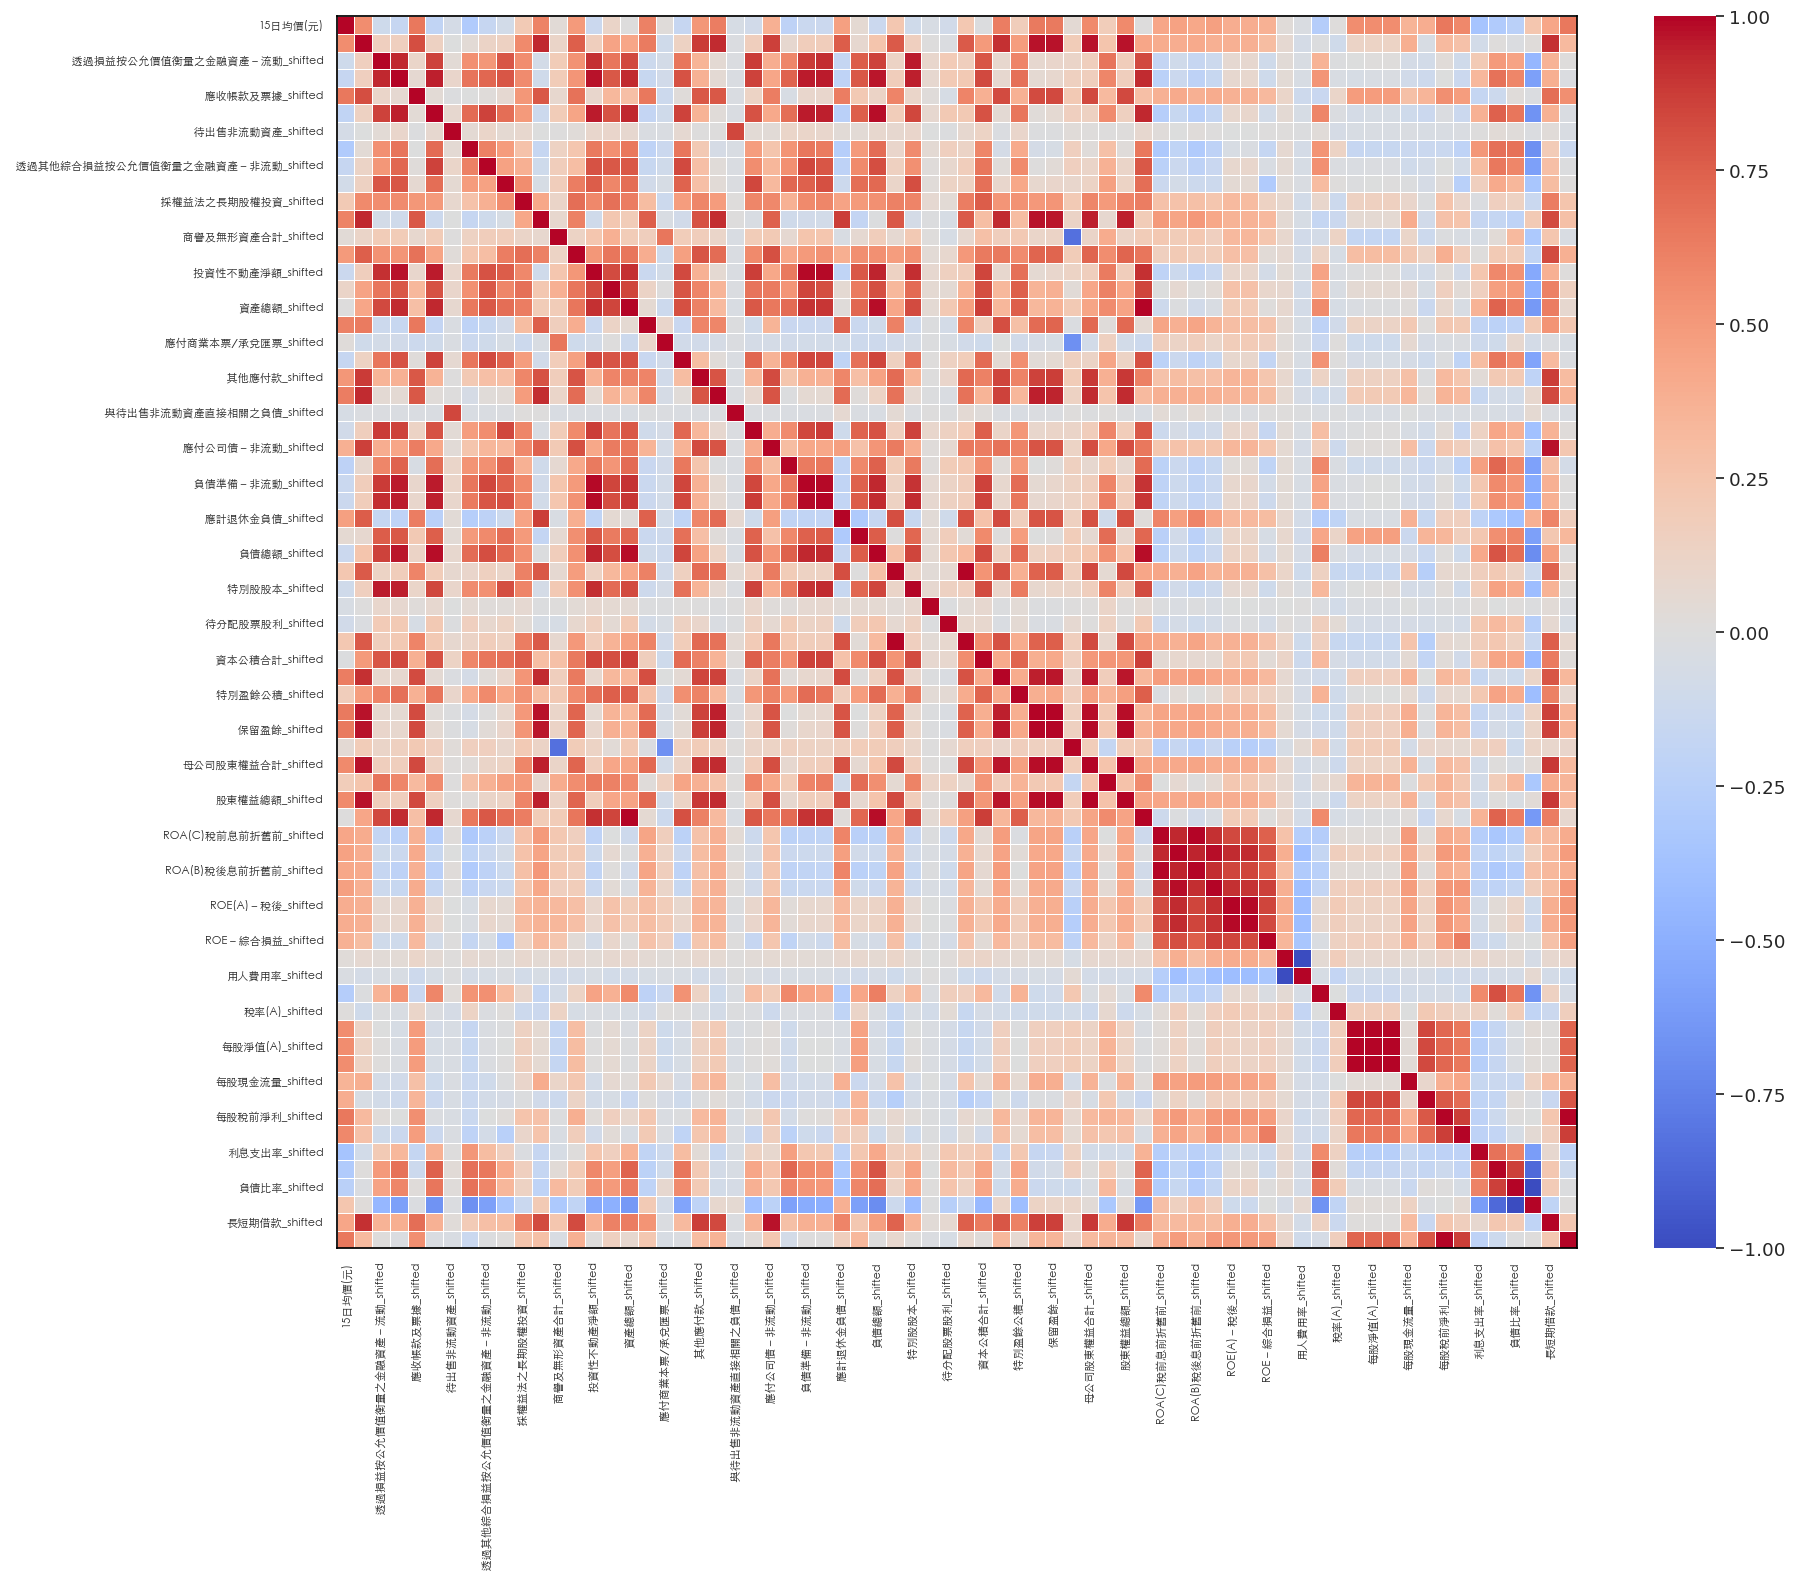

In [ ]:
# 變數相關性熱力圖 

import warnings

# 忽略警告訊息
warnings.filterwarnings('ignore')


# 畫熱力圖
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties



# 設定字型 os.path.join(project_path, 'STHeiti Light.ttc')
# font_path = '/content/gdrive/My Drive/Colab Notebooks/PyML/Project_Fundamental/STHeiti Light.ttc'
font_path = os.path.join(project_path, 'STHeiti Light.ttc')
custom_font = FontProperties(fname=font_path, size=8)


# 設定圖形的尺寸
plt.figure(figsize=(20, 16))

# 繪製熱力圖
sns.set(font_scale=1.2, font=custom_font.get_name())
heatmap = sns.heatmap(correlation_table, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.xticks(fontproperties=custom_font)
plt.yticks(fontproperties=custom_font)

# 設定每個單元格的字體
for _, spine in heatmap.spines.items():
    spine.set_visible(True)
    spine.set_color('black')

for text in heatmap.texts:
    text.set_fontproperties(custom_font)
    text.set_color('black')

# 顯示圖形
plt.show()

## **2. 取得訓練資料和測試資料及參數調整**


In [ ]:
# 定義 X、y
X = X_root.iloc[:377]   #取第2、3行(公司和年月)、第5行以後(綜合財報資訊)
y = y_root.iloc[:377]
X

,應收帳款及票據_shifted,當期所得稅資產－流動_shifted,採權益法之長期股權投資_shifted,遞延所得稅資產_shifted,短期借款_shifted,普通股股本_shifted,股本_shifted,ROA(C)稅前息前折舊前_shifted,有息負債利率_shifted,每股現金流量_shifted,每股稅前淨利_shifted,利息支出率_shifted,淨值/資產_shifted,稅前純益 /實收資本_shifted
0,599227.0,0.0,0.0,182861.0,391668.0,6499300.0,6499300.0,4.90,0.86,0.78,0.63,0.40,85.72,6.27
1,17436455.0,75088.0,8574346.0,3136352.0,4544512.0,129532805.0,129539658.0,3.54,0.39,0.56,0.60,2.48,71.37,5.82
2,65906835.0,0.0,24252070.0,11610593.0,35842800.0,259282327.0,259282327.0,8.08,0.43,2.84,1.76,1.24,72.40,17.64
3,67381156.0,1195973.0,195357.0,3286155.0,1411262.0,28347268.0,28347268.0,0.55,1.01,-2.06,0.17,28.58,34.95,1.59
4,65351624.0,0.0,24752355.0,5317333.0,4136782.0,7527603.0,7527603.0,2.79,0.47,-0.46,9.61,0.47,51.34,96.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,51363858.0,354479.0,1174374.0,3705388.0,1652086.0,30478538.0,30478538.0,3.01,1.14,1.98,2.62,3.36,37.26,25.83
373,91311372.0,0.0,22171608.0,18622165.0,48897458.0,7427603.0,7427603.0,3.66,1.78,-21.17,29.10,4.37,48.15,291.02
374,8287793.0,0.0,1794033.0,575978.0,20550000.0,35192336.0,35192336.0,18.71,0.95,10.49,5.74,5.44,37.73,46.01
375,194400.0,0.0,0.0,0.0,0.0,3278399.0,3280312.0,-20.61,1.55,-3.40,-4.56,-1.85,68.44,-44.95


In [ ]:
# 切 testing/training
# 因股價為時間序列資料，所以依時間順序來切
ratio = 100
ratiovalues = [5,10,20,40,60,80]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 10
depthvalues = [i for i in range(1, depth)]
leaf = 5
leafvalues = [i for i in range(1, leaf)]
etavalue = [i for i in np.arange(0.1,0.4,0.1)]

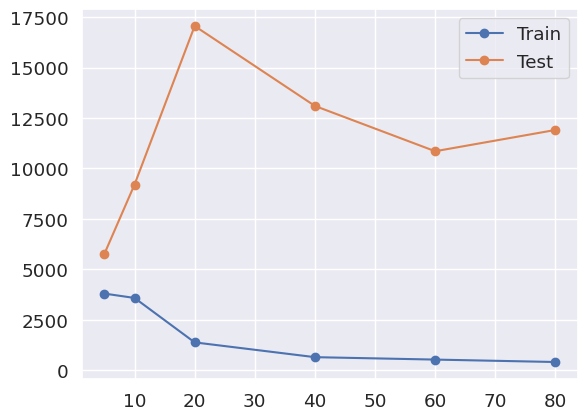

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm as td
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import xgboost

# polyregression
poly_train_scores = []
poly_test_scores = []
for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False, test_size = i/100, random_state=2023)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_poly_train = linreg.predict(X_train)
    y_poly_trainscore= mean_squared_error(y_train , y_poly_train)
    poly_train_scores.append(y_poly_trainscore)
    y_poly_test = linreg.predict(X_test)
    y_poly_testscore = mean_squared_error(y_test , y_poly_test)
    poly_test_scores.append(y_poly_testscore)
plt.plot(ratiovalues, poly_train_scores, '-o', label='Train')
plt.plot(ratiovalues, poly_test_scores, '-o', label='Test')
plt.legend()
plt.show()

XGBoostregressor 找最優的係數

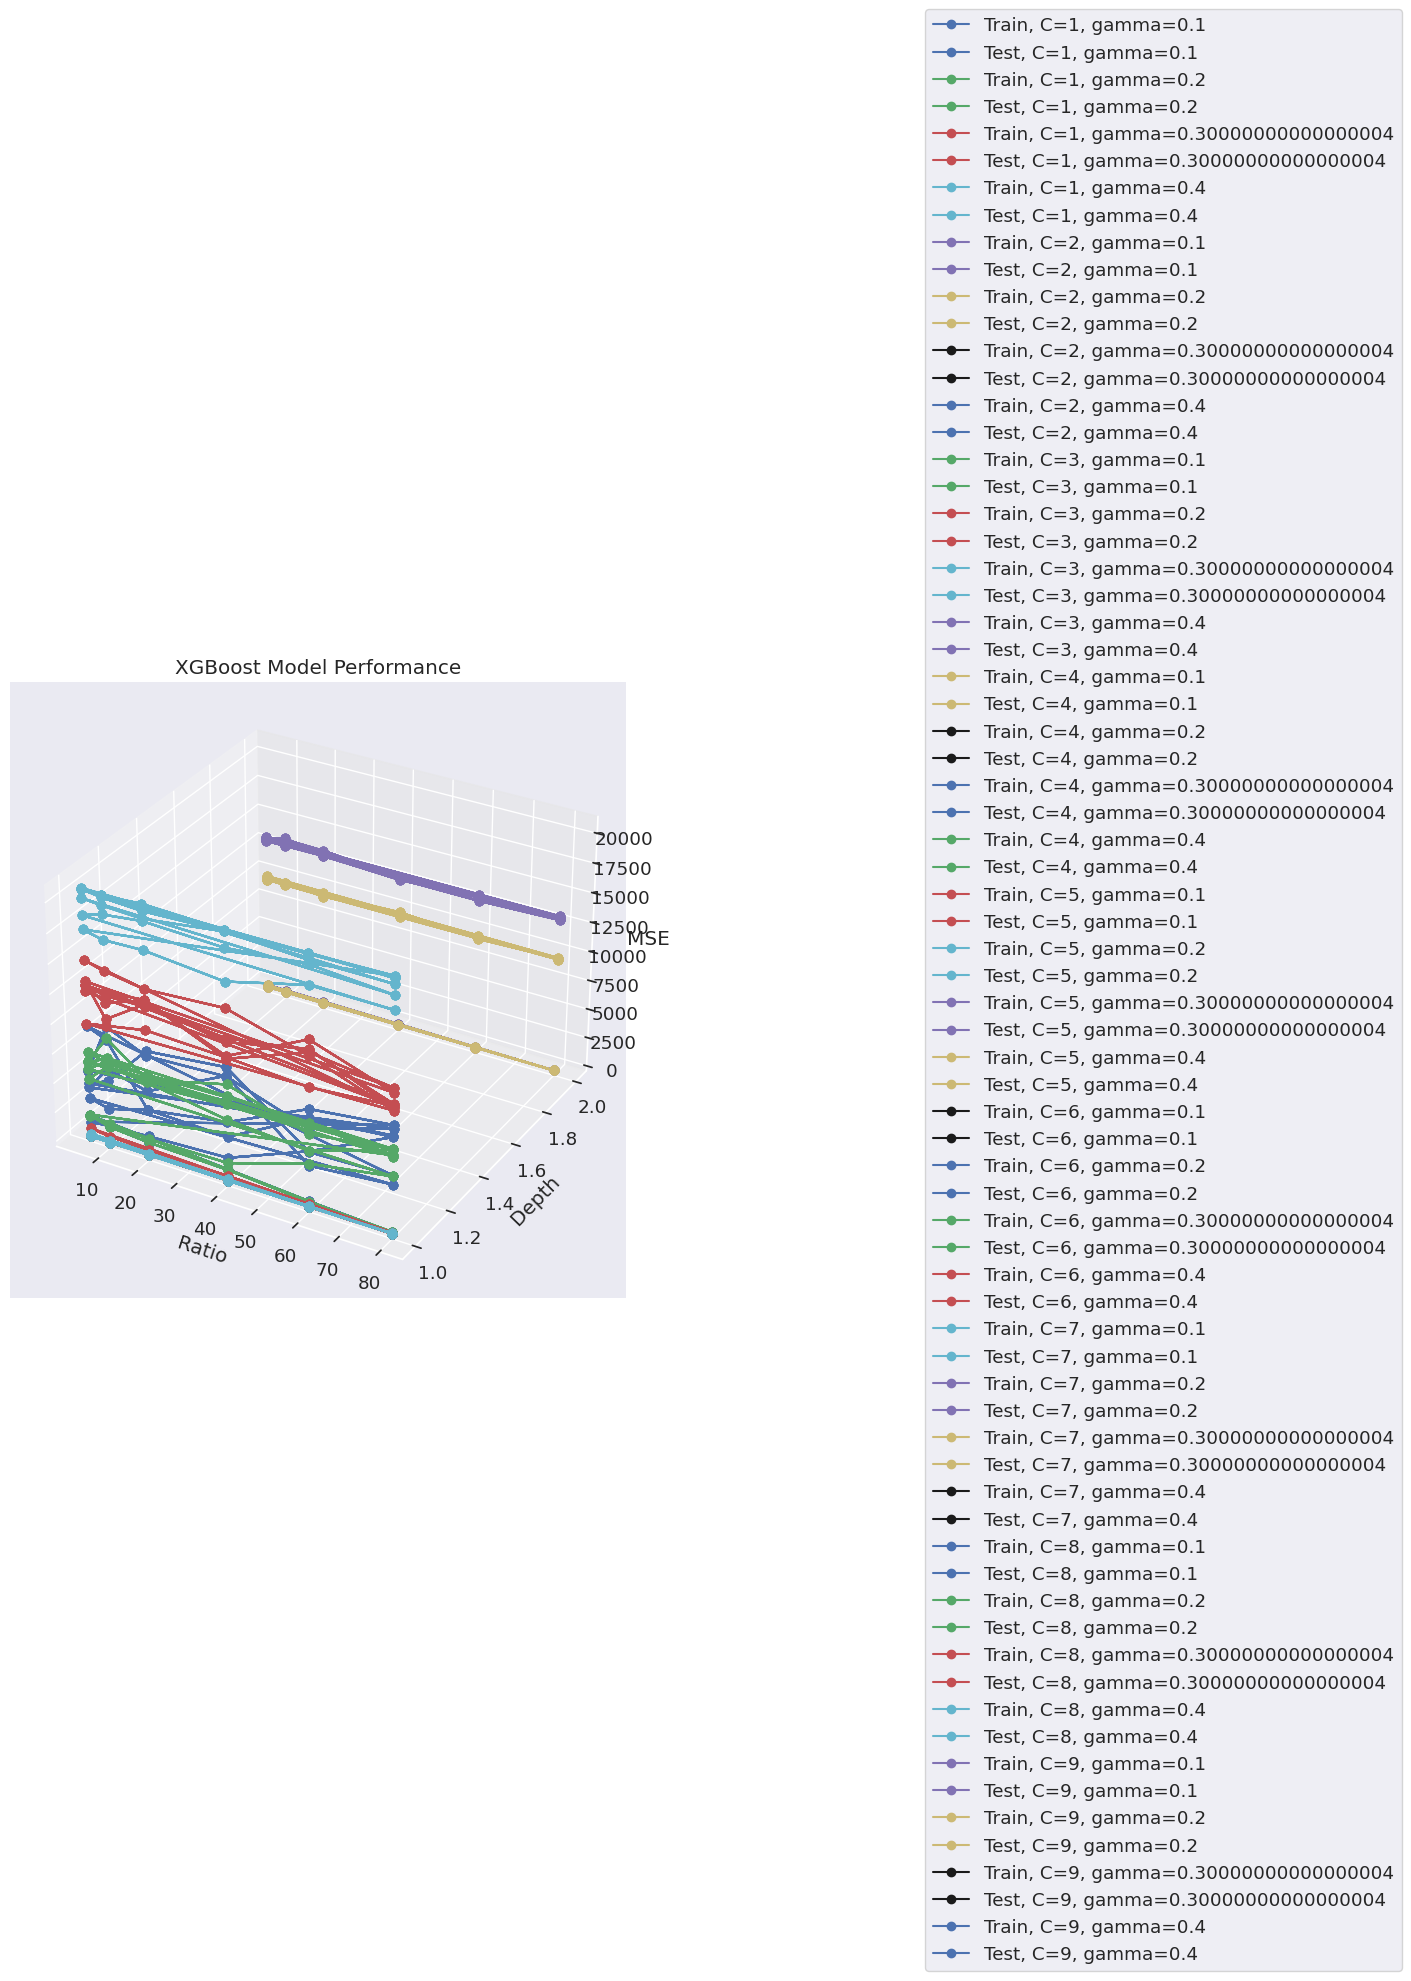

best ratio: 80
best depth: 9
best eta: 0.4


In [ ]:
#XGBoostregressor
from mpl_toolkits.mplot3d import Axes3D
import itertools
import matplotlib.gridspec as gridspec
xg_best_train = 0
xg_best_test = 0
xg_best_eta = 0
xg_best_depth = 0
xg_best_ratio = 0
xg_train_scores = []
xg_test_scores = []

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_cycle = itertools.cycle(colors)




for k ,depth in enumerate(depthvalues):
  for j , eta in enumerate(etavalue):
    xg_train_scores_j = []
    xg_test_scores_j = []
    for i in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False, test_size = i/100, random_state=2023)
        params = {
            'objective': 'reg:squarederror',  # 回歸問題
            'eta': eta,  # 學習率
            'max_depth': depth,  # 樹的深度
            'lambda': 1,  # L2 正則化參數
            'random_state': 42  # 隨機種子
            }
        dtrain = xgboost.DMatrix(X_train,label = y_train)
        dtest = xgboost.DMatrix(X_test,label = y_test)
        bst = xgboost.train(params, dtrain , 100)
        y_xg_pred_train = bst.predict(dtrain)
        xg_pred_train = mean_squared_error(y_train,y_xg_pred_train)
        xg_train_scores_j.append(xg_pred_train)
        y_xg_pred_test = bst.predict(dtest)
        xg_pred_test = mean_squared_error(y_test, y_xg_pred_test)
        xg_test_scores_j.append(xg_pred_test)
        if (xg_pred_test >= xg_best_test) and (xg_pred_train > xg_best_train):
            xg_best_depth = depth
            xg_best_eta = eta
            xg_best_ratio = i
    xg_train_scores.append(xg_train_scores_j)
    xg_test_scores.append(xg_test_scores_j)


fig = plt.figure(figsize=(20, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
ax1 = fig.add_subplot(gs[0], projection='3d')
ax2 = fig.add_subplot(gs[1])


for k, depth in enumerate(depthvalues):
    for j, eta in enumerate(etavalue):
        train_scores = np.array([row[j + len(etavalue) * k] for row in xg_train_scores if len(row) > j + len(etavalue) * k])
        test_scores = np.array([row[j + len(etavalue) * k] for row in xg_test_scores if len(row) > j + len(etavalue) * k])
        ratio_mesh, depth_mesh = np.meshgrid(ratiovalues[:len(train_scores)], [depth] * len(train_scores))
        train_scores_mesh = np.tile(train_scores, (len(ratiovalues), 1))
        test_scores_mesh = np.tile(test_scores, (len(ratiovalues), 1))
        color = next(color_cycle)
        ax1.plot(ratio_mesh.flatten(), depth_mesh.flatten(), train_scores_mesh.flatten(), '-o', label='Train, C={}, gamma={}'.format(depth, eta), color=color)
        ax1.plot(ratio_mesh.flatten(), depth_mesh.flatten(), test_scores_mesh.flatten(), '-o', label='Test, C={}, gamma={}'.format(depth, eta), color=color)



ax1.set_xlabel('Ratio')
ax1.set_ylabel('Depth')
ax1.set_zlabel('MSE')
ax1.set_title('XGBoost Model Performance')


ax2.axis('off')
ax2.legend(*ax1.get_legend_handles_labels(), loc='center')
plt.show()


print("best ratio:",xg_best_ratio)
print("best depth:",xg_best_depth)
print('best eta:',xg_best_eta)

SVR找最優的係數

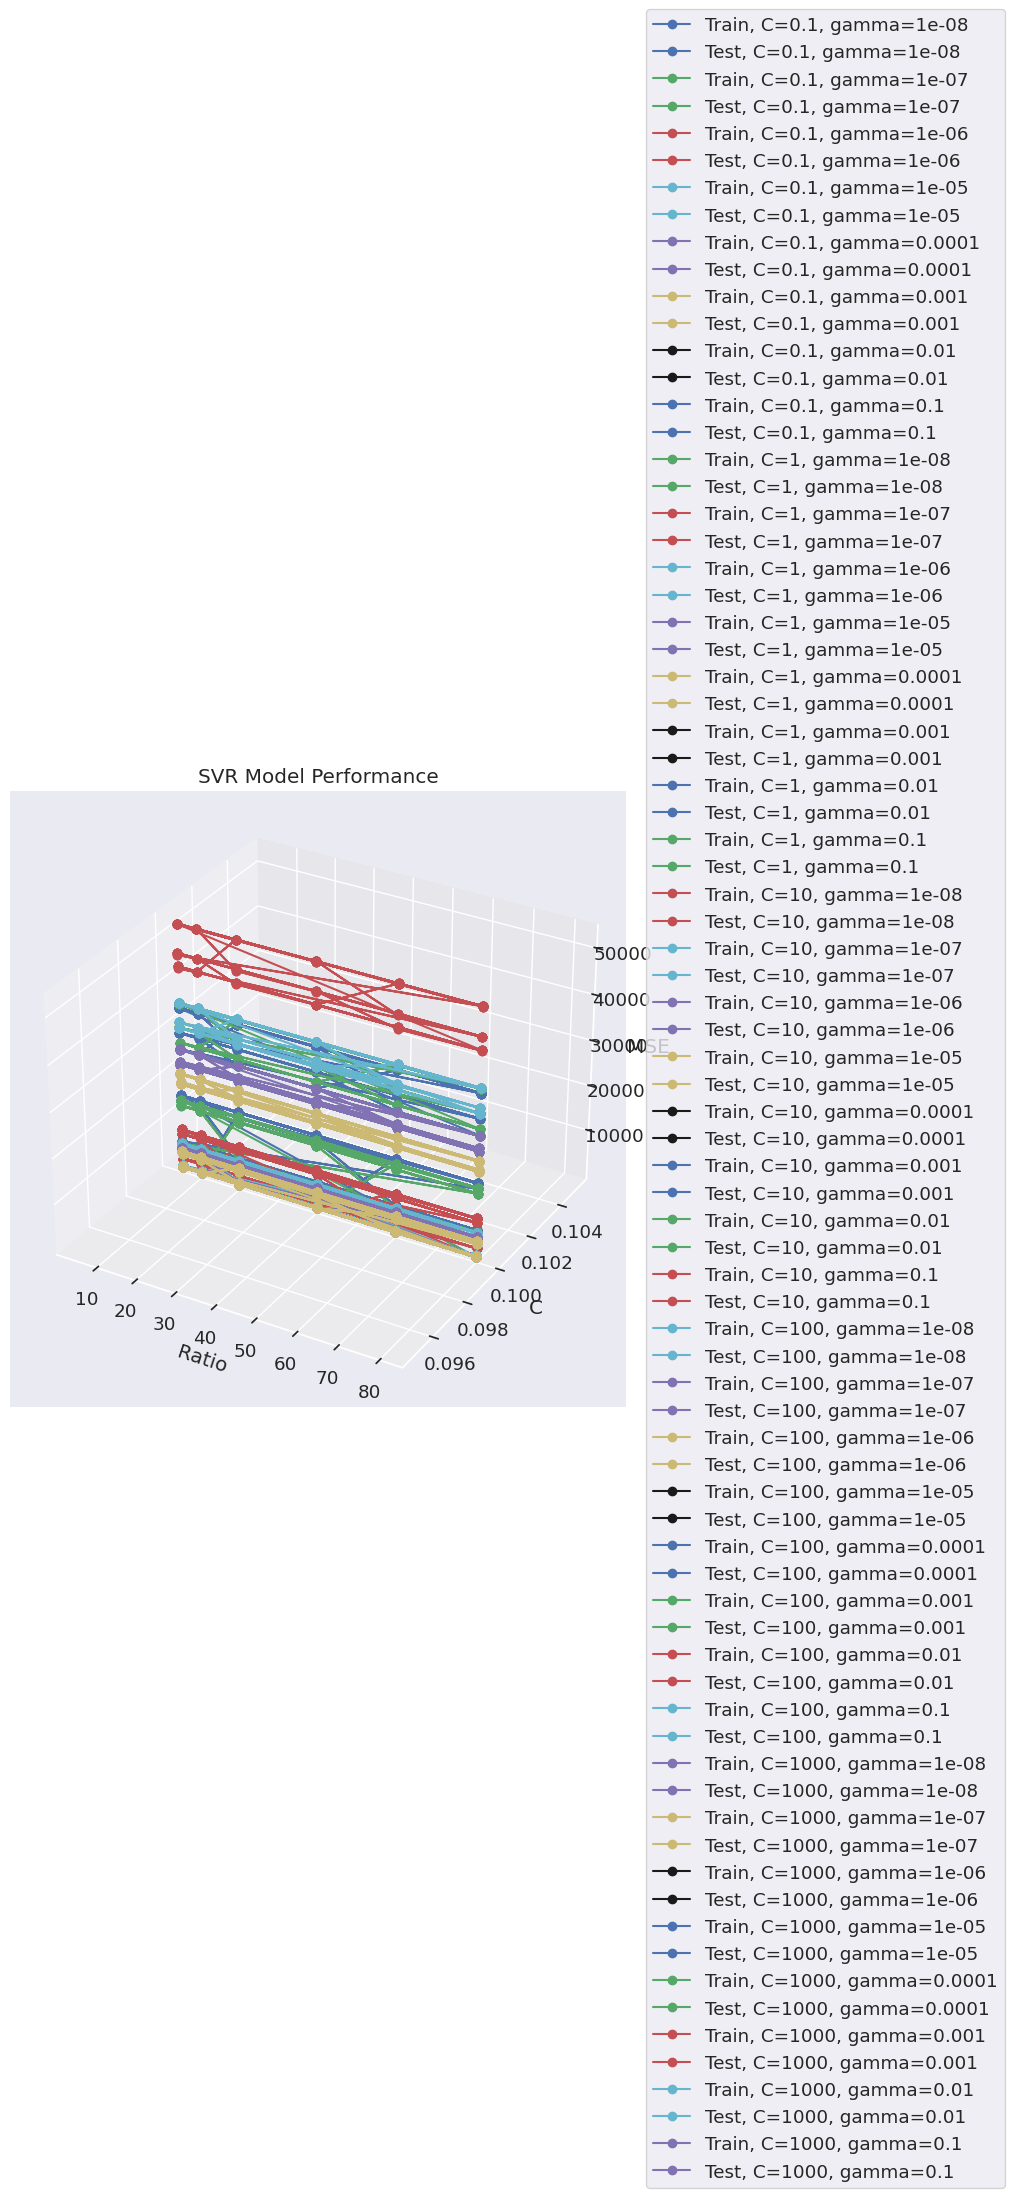

best ratio: 80
best C: 1000
best gamma: 1e-08


In [ ]:
from mpl_toolkits.mplot3d import Axes3D


best_svr_test = 100000000
best_svr_train = 1000000000000
best_c = 100000000
best_ratio = 0
best_gamma = 0
svr_train_scores = []
svr_test_scores = []
cvalues = [0.1, 1, 10, 100, 1000]
gammavalues = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]




for i, c in enumerate(cvalues):
    for j, gamma in enumerate(gammavalues):
        svr_train_scores_i = []
        svr_test_scores_i = []

        for ratio in ratiovalues:
            svrmodel = SVR(kernel='rbf', C=c, gamma=gamma)
            X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=ratio/100, random_state=2023)
            svrmodel.fit(X_train, y_train)
            y_svr_train = svrmodel.predict(X_train)
            svrscore_train = mean_squared_error(y_svr_train, y_train)
            svr_train_scores_i.append(svrscore_train)
            y_svr_test = svrmodel.predict(X_test)
            svrscore_test = mean_squared_error(y_svr_test, y_test)
            svr_test_scores_i.append(svrscore_test)

            if svrscore_test < best_svr_test and svrscore_train < best_svr_train:
                best_svr_test = svrscore_test
                best_svr_train = svrscore_train
                best_c = c
                best_ratio = ratio
                best_gamma = gamma
        svr_train_scores.append(svr_train_scores_i)
        svr_test_scores.append(svr_test_scores_i)


import itertools
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
ax1 = fig.add_subplot(gs[0], projection='3d')
ax2 = fig.add_subplot(gs[1])

# 使用 itertools.cycle 建立迭代
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] 
color_cycle = itertools.cycle(colors)

for i, c in enumerate(cvalues):
    for j, gamma in enumerate(gammavalues):
        train_scores = np.array([row[j + len(gammavalues) * i] for row in svr_train_scores if len(row) > j + len(gammavalues) * i])
        test_scores = np.array([row[j + len(gammavalues) * i] for row in svr_test_scores if len(row) > j + len(gammavalues) * i])
        ratio_mesh, C_mesh = np.meshgrid(ratiovalues[:len(train_scores)], [c] * len(train_scores))
        train_scores_mesh = np.tile(train_scores, (len(ratiovalues), 1))
        test_scores_mesh = np.tile(test_scores, (len(ratiovalues), 1))
        color = next(color_cycle)  # 獲取下一個顏色
        ax1.plot(ratio_mesh.flatten(), C_mesh.flatten(), train_scores_mesh.flatten(), '-o', label='Train, C={}, gamma={}'.format(c, gamma), color=color)
        ax1.plot(ratio_mesh.flatten(), C_mesh.flatten(), test_scores_mesh.flatten(), '-o', label='Test, C={}, gamma={}'.format(c, gamma), color=color)



ax1.set_xlabel('Ratio')
ax1.set_ylabel('C')
ax1.set_zlabel('MSE')
ax1.set_title('SVR Model Performance')


ax2.axis('off')
ax2.legend(*ax1.get_legend_handles_labels(), loc='center')
plt.show()

best_svr_test = svrscore_test
best_svr_train = svrscore_train
best_c = c
print("best ratio:",best_ratio)
print("best C:",best_c)
print('best gamma:',best_gamma)





------------------------------------------------------------

## **3. 模型訓練、預測及成效衡量**


- 取得訓練/測試資料、最佳係數模型
- 丟測試資料
- 模型準確衡量
- 預期股價輸出
- 重要變數


Polyregression 

In [ ]:
# 定義 X、y
X = X_root.iloc[:377]   #取綜合財報資訊
y = y_root.iloc[:377]

In [ ]:
# 取得 polyregression 最好的模型係數來訓練並預測
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False, test_size = 60/100, random_state=2023)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# 加上 202306 欄位
X_test = pd.concat([X_test,X_root.iloc[377:,:]])
y_poly_train = linreg.predict(X_train)
y_poly_test = linreg.predict(X_test)
X_test

,應收帳款及票據_shifted,當期所得稅資產－流動_shifted,採權益法之長期股權投資_shifted,遞延所得稅資產_shifted,短期借款_shifted,普通股股本_shifted,股本_shifted,ROA(C)稅前息前折舊前_shifted,有息負債利率_shifted,每股現金流量_shifted,每股稅前淨利_shifted,利息支出率_shifted,淨值/資產_shifted,稅前純益 /實收資本_shifted
150,48705502.0,1835141.0,23598556.0,16126499.0,0.0,102336040.0,108336040.0,0.16,3.65,-4.61,0.93,42.21,6.86,8.77
151,14766620.0,0.0,1548477.0,702500.0,2069858.0,34208328.0,34208328.0,5.63,0.29,2.75,1.80,3.75,47.39,14.33
152,5673989.0,0.0,0.0,842316.0,308310.0,6461655.0,6461655.0,-0.71,0.61,-0.71,-1.38,-1.24,79.86,-13.76
153,726413.0,0.0,0.0,467966.0,469785.0,7603262.0,7907392.0,3.99,2.33,0.46,0.36,10.78,79.43,3.43
154,22226417.0,22244.0,10704689.0,6163865.0,22088057.0,126243187.0,126243187.0,7.76,1.18,2.30,0.26,29.30,55.26,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,8052711.0,169667.0,359584.0,4018272.0,0.0,136427459.0,136427459.0,0.65,22.31,3.17,1.54,62.56,5.09,15.39
383,25488097.0,2262308.0,57812659.0,74819172.0,0.0,123952126.0,139952026.0,0.64,16.23,11.47,4.67,56.56,5.42,43.55
384,8228133.0,0.0,1744956.0,579190.0,15410000.0,35192336.0,35192336.0,4.71,0.30,1.70,1.44,6.79,39.76,11.54
385,0.0,0.0,0.0,0.0,0.0,3280312.0,3283568.0,-2.33,0.44,-0.16,-0.65,-4.53,68.97,-6.46


In [ ]:
test_indices = X_test.index.values
corresponding_rows = final_df.loc[test_indices, ['公司', 'Year-Month']]

In [ ]:
# 輸出 testing y 預測股價
# 將預測結果和公司和年月合併             


y_pred_df = pd.DataFrame({'預測股價': y_poly_test}, index=corresponding_rows.index)


# 使用 concat 函數將 corresponding_rows 和 y_pred_df 合併為一個新的 DataFrame
prediction_result = pd.concat([corresponding_rows, y_pred_df], axis=1)
prediction_result

prediction_result_sorted = prediction_result.sort_values(by=['公司', 'Year-Month'])
prediction_result_sorted

prediction_result_2023_06_regression = prediction_result_sorted.loc[prediction_result_sorted['Year-Month'] == '2023-06']

# 印出各公司 2023 年 6 月的預測股價
prediction_result_2023_06_regression

,公司,Year-Month,預測股價
377,1789 神隆,2023-06,31.944221
378,2303 聯電,2023-06,31.602176
379,2330 台積電,2023-06,502.741542
380,2353 宏碁,2023-06,79.790913
381,2357 華碩,2023-06,206.914311
382,2880 華南金,2023-06,5.429209
383,2881 富邦金,2023-06,408.877675
384,3045 台灣大,2023-06,53.771287
385,6547 高端疫苗,2023-06,34.106966
386,8046 南電,2023-06,54.491608


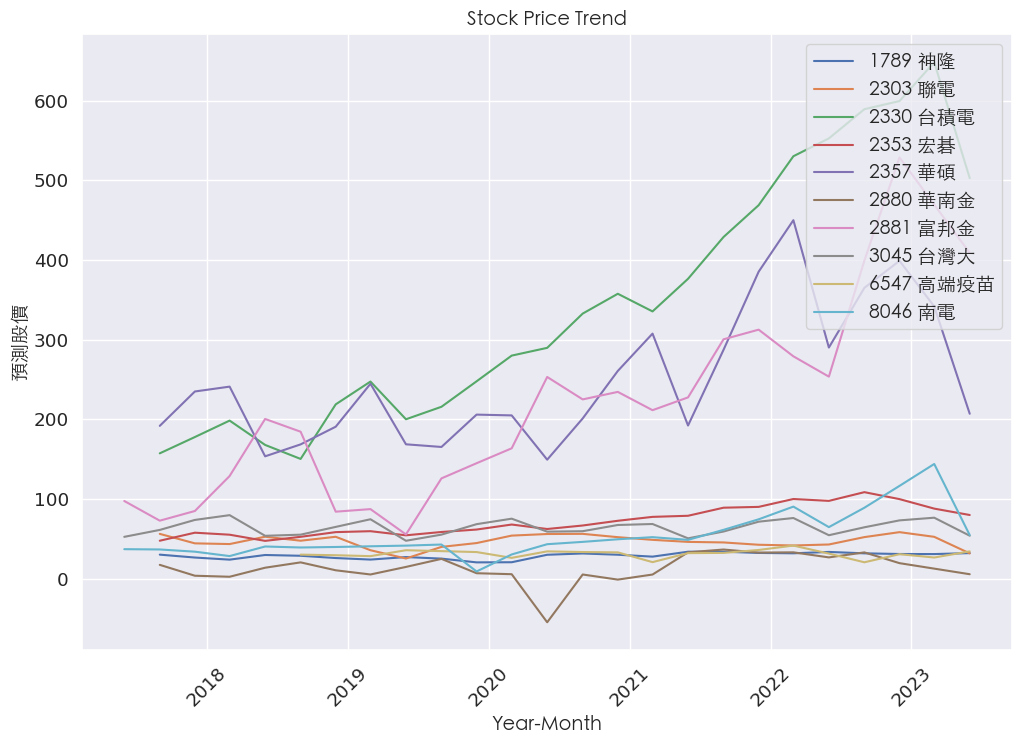

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import warnings

# 忽略警告訊息
warnings.filterwarnings('ignore')

# 指定中文字型
# font = FontProperties(fname='/content/gdrive/My Drive/Colab Notebooks/PyML/Project_Fundamental/STHeiti Light.ttc', size=14)
font = FontProperties(fname=os.path.join(project_path, 'STHeiti Light.ttc'), size=14)

# 按照公司和年月排序的預測結果 DataFrame
prediction_result_sorted = prediction_result.sort_values(by=['公司', 'Year-Month'])

# 取出公司名稱
companies = prediction_result_sorted['公司'].unique()

# 調整圖形大小
plt.figure(figsize=(12, 8))

# 逐一繪製各公司的趨勢圖
for company in companies:
    company_data = prediction_result_sorted[prediction_result_sorted['公司'] == company]
    x = pd.to_datetime(company_data['Year-Month'])  # 轉換為 datetime 格式
    y = company_data['預測股價']
    
    # 依照 x 值排序
    sorted_indices = x.argsort()
    x_sorted = x.iloc[sorted_indices]
    y_sorted = y.iloc[sorted_indices]
    
    plt.plot(x_sorted, y_sorted, label=company)

# 設定標籤和標題
plt.xlabel('Year-Month', fontproperties=font)
plt.ylabel('預測股價', fontproperties=font)
plt.title('Stock Price Trend', fontproperties=font)

# 調整 x 軸標籤顯示間隔
plt.xticks(rotation=45)

# 加入圖例，設定位置為右上角
plt.legend(prop=font, loc='upper right')

# 顯示圖形
plt.show()


In [ ]:
# 衡量模型準確度
from sklearn.metrics import mean_squared_error

# 計算訓練集的 MSE
mse_train = mean_squared_error(y_train, y_poly_train)
print("訓練集的 MSE:", mse_train)

# 計算測試集的 MSE
mse_test = mean_squared_error(y_test, y_poly_test[:-10])
print("測試集的 MSE:", mse_test)


訓練集的 MSE: 530.3499692188426
測試集的 MSE: 10853.608810659309


In [ ]:
# 多元回歸重要變數
from sklearn.linear_model import LinearRegression
import numpy as np

# 創建線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 取得迴歸係數的絕對值作為重要性指標
importance = np.abs(model.coef_)
features = X_train.columns

# 顯示前10個重要變數
top_features = sorted(zip(importance, features), reverse=True)[:10]
for importance, feature in top_features:
    print(f"{feature}: {importance}")


每股稅前淨利_shifted: 20.549377524001002
稅前純益 /實收資本_shifted: 1.678745880087783
有息負債利率_shifted: 0.7809608171300852
每股現金流量_shifted: 0.6359487109664078
ROA(C)稅前息前折舊前_shifted: 0.4214210096591013
利息支出率_shifted: 0.3913548610804077
淨值/資產_shifted: 0.10883783501570973
  當期所得稅資產－流動_shifted: 2.0074889326835824e-05
    遞延所得稅資產_shifted: 6.021222207682248e-06
    普通股股本_shifted: 2.0516128150204164e-06


XGboostregressor預測結果

In [ ]:
# 定義 X、y
X = X_root.iloc[:377]   #取第2、3行(公司和年月)、第5行以後(綜合財報資訊)
y = y_root.iloc[:377]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False, test_size = 80/100, random_state=2023)
params = {
    'objective': 'reg:squarederror',  # 回歸問題
    'eta': 0.4,  # 學習率
    'max_depth': 9,  # 樹的深度
    'lambda': 1,  # L2 正則化參數
    'random_state': 42  # 隨機種子
    }

dtrain = xgboost.DMatrix(X_train,label = y_train)
dtest = xgboost.DMatrix(X_test,label = y_test)
dtest_2 = xgboost.DMatrix(X_root.iloc[377:,:])

bst = xgboost.train(params, dtrain , 100)
xg_pred_train = bst.predict(dtrain)
xg_pred_train = mean_squared_error(y_train,y_xg_pred_train)
xg_train_scores.append(xg_pred_train)
xg_pred_test = bst.predict(dtest)
xg_pred_test_2 = bst.predict(dtest_2)
y_pred_test = mean_squared_error(y_test, y_xg_pred_test)
xg_test_scores.append(xg_pred_train)



import numpy as np
test_indices = X_test.index.values
test_indices_2 = X_root.iloc[377:,:].index.values
corresponding_rows = final_df.loc[np.concatenate((test_indices, test_indices_2)), ['公司', 'Year-Month']]

In [ ]:
# 輸出 testing y 預測股價
# 將預測結果和公司和年月合併             


y_pred_df = pd.DataFrame({'預測股價': np.concatenate((xg_pred_test, xg_pred_test_2))}, index=corresponding_rows.index)




# 使用 concat 函數將 corresponding_rows 和 y_pred_df 合併為一個新的 DataFrame
prediction_result = pd.concat([corresponding_rows, y_pred_df], axis=1)
prediction_result

prediction_result_sorted = prediction_result.sort_values(by=['公司', 'Year-Month'])
prediction_result_sorted

prediction_result_2023_06_xgb = prediction_result_sorted.loc[prediction_result_sorted['Year-Month'] == '2023-06']

# 印出各公司 2023 年 6 月的預測股價
prediction_result_2023_06_xgb

,公司,Year-Month,預測股價
377,1789 神隆,2023-06,42.727634
378,2303 聯電,2023-06,57.399136
379,2330 台積電,2023-06,100.942192
380,2353 宏碁,2023-06,17.066940
381,2357 華碩,2023-06,78.087639
382,2880 華南金,2023-06,11.730513
383,2881 富邦金,2023-06,61.571854
384,3045 台灣大,2023-06,58.434155
385,6547 高端疫苗,2023-06,45.085548
386,8046 南電,2023-06,54.565952


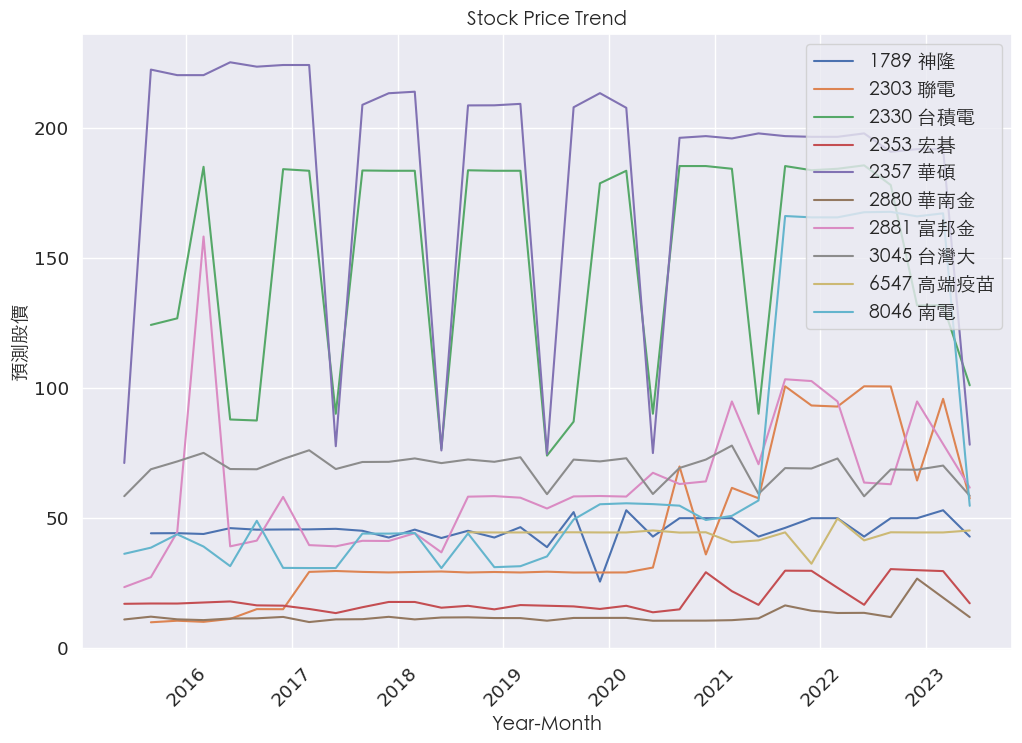

In [ ]:
# 指定中文字型
# font = FontProperties(fname='/content/gdrive/My Drive/Colab Notebooks/PyML/Project_Fundamental/STHeiti Light.ttc', size=14)
font = FontProperties(fname=os.path.join(project_path, 'STHeiti Light.ttc'), size=14)

# 按照公司和年月排序的預測結果 DataFrame
prediction_result_sorted = prediction_result.sort_values(by=['公司', 'Year-Month'])

# 取出公司名稱
companies = prediction_result_sorted['公司'].unique()

# 調整圖形大小
plt.figure(figsize=(12, 8))

# 逐一繪製各公司的趨勢圖
for company in companies:
    company_data = prediction_result_sorted[prediction_result_sorted['公司'] == company]
    x = pd.to_datetime(company_data['Year-Month'])  # 轉換為 datetime 格式
    y = company_data['預測股價']
    
    # 依照 x 值排序
    sorted_indices = x.argsort()
    x_sorted = x.iloc[sorted_indices]
    y_sorted = y.iloc[sorted_indices]
    
    plt.plot(x_sorted, y_sorted, label=company)

# 設定標籤和標題
plt.xlabel('Year-Month', fontproperties=font)
plt.ylabel('預測股價', fontproperties=font)
plt.title('Stock Price Trend', fontproperties=font)

# 調整 x 軸標籤顯示間隔
plt.xticks(rotation=45)

# 加入圖例，設定位置為右上角
plt.legend(prop=font, loc='upper right')

# 顯示圖形
plt.show()

In [ ]:
# 計算整體模型的訓練集 MSE
overall_mse_train = np.mean(xg_train_scores)
mse_avg_train = np.mean(overall_mse_train)
print("訓練集 MSE:", mse_avg_train)

# 計算整體模型的測試集 MSE
overall_mse_test = np.mean(xg_test_scores)
mse_avg_test = np.mean(overall_mse_test)
print("測試集 MSE:", mse_avg_test)

訓練集 MSE: 2.045464321307714
測試集 MSE: 301.2855462077842


In [ ]:
# XBG 重要變數
import xgboost as xgb
import matplotlib.pyplot as plt

# 創建XGBoost模型（已訓練完成）
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# 取得重要變數的分數
importance = model.feature_importances_
features = X_train.columns

# 顯示前10個重要變數
top_features = sorted(zip(importance, features), reverse=True)[:10]
for importance, feature in top_features:
    print(f"{feature}: {importance}")

稅前純益 /實收資本_shifted: 0.8838732242584229
  當期所得稅資產－流動_shifted: 0.07893867045640945
    普通股股本_shifted: 0.015522556379437447
淨值/資產_shifted: 0.006122684106230736
  採權益法之長期股權投資_shifted: 0.004142888356000185
    遞延所得稅資產_shifted: 0.0027675617020577192
每股稅前淨利_shifted: 0.0023191585205495358
ROA(C)稅前息前折舊前_shifted: 0.001818023039959371
利息支出率_shifted: 0.0014838390052318573
  應收帳款及票據_shifted: 0.0014059750828891993


svr預測結果

In [ ]:
# 定義 X、y
X = X_root.iloc[:377]   #取第2、3行(公司和年月)、第5行以後(綜合財報資訊)
y = y_root.iloc[:377]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False, test_size = 80/100, random_state=2023)
svrmodel = SVR(kernel='rbf' , C=1000 , gamma= 1e-8)
svrmodel.fit(X_train,y_train)
y_svr_train = svrmodel.predict(X_train)
svrscore_train = mean_squared_error(y_svr_train , y_train)
X_test = pd.concat([X_test,X_root.iloc[377:,:]])
y_svr_test = svrmodel.predict(X_test)

svrscore = mean_squared_error(y_svr_test[:-10] , y_test)


In [ ]:
test_indices = X_test.index.values
corresponding_rows = final_df.loc[test_indices, ['公司', 'Year-Month']]

In [ ]:
# 輸出 testing y 預測股價
# 將預測結果和公司和年月合併             

y_pred_df = pd.DataFrame({'預測股價': y_svr_test}, index=corresponding_rows.index)




# 使用 concat 函數將 corresponding_rows 和 y_pred_df 合併為一個新的 DataFrame
prediction_result = pd.concat([corresponding_rows, y_pred_df], axis=1)
prediction_result

prediction_result_sorted = prediction_result.sort_values(by=['公司', 'Year-Month'])
prediction_result_sorted


prediction_result_2023_06 = prediction_result_sorted.loc[prediction_result_sorted['Year-Month'] == '2023-06']

# 印出各公司 2023 年 6 月的預測股價
prediction_result_2023_06

,公司,Year-Month,預測股價
377,1789 神隆,2023-06,58.845984
378,2303 聯電,2023-06,58.845984
379,2330 台積電,2023-06,58.845984
380,2353 宏碁,2023-06,58.845984
381,2357 華碩,2023-06,58.845984
382,2880 華南金,2023-06,58.845984
383,2881 富邦金,2023-06,58.845984
384,3045 台灣大,2023-06,58.845984
385,6547 高端疫苗,2023-06,58.845984
386,8046 南電,2023-06,58.845984


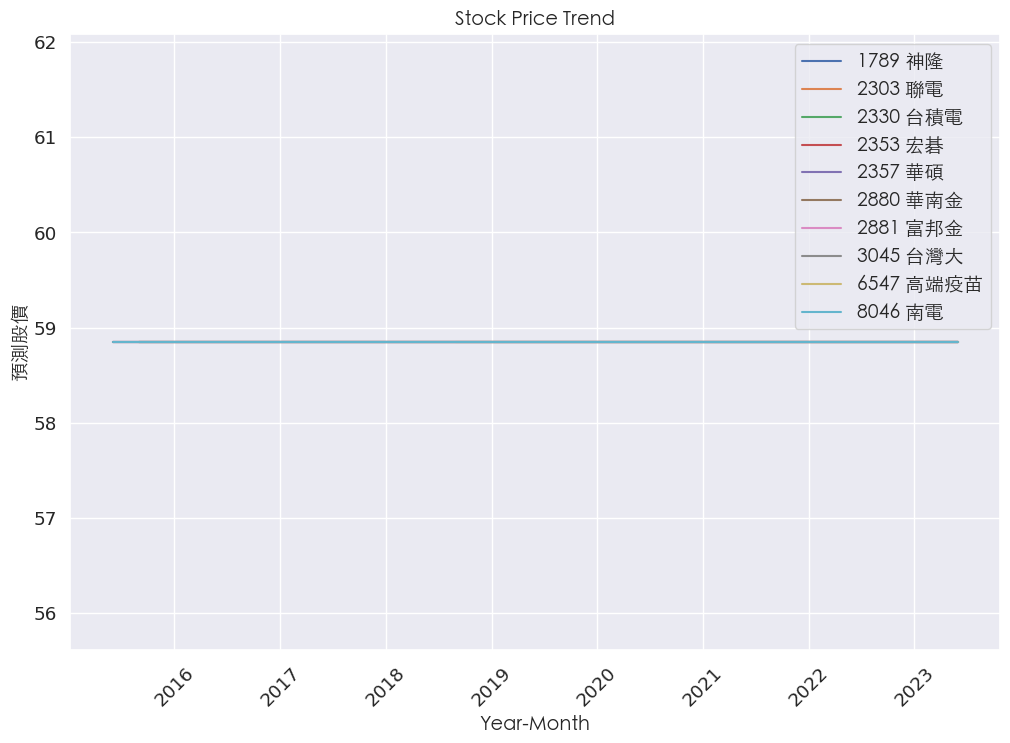

In [ ]:
# 指定中文字型
# font = FontProperties(fname='/content/gdrive/My Drive/Colab Notebooks/PyML/Project_Fundamental/STHeiti Light.ttc', size=14)
font = FontProperties(fname=os.path.join(project_path, 'STHeiti Light.ttc'), size=14)
# 按照公司和年月排序的預測結果 DataFrame
prediction_result_sorted = prediction_result.sort_values(by=['公司', 'Year-Month'])

# 取出公司名稱
companies = prediction_result_sorted['公司'].unique()

# 調整圖形大小
plt.figure(figsize=(12, 8))

# 逐一繪製各公司的趨勢圖
for company in companies:
    company_data = prediction_result_sorted[prediction_result_sorted['公司'] == company]
    x = pd.to_datetime(company_data['Year-Month'])  # 轉換為 datetime 格式
    y = company_data['預測股價']
    
    # 依照 x 值排序
    sorted_indices = x.argsort()
    x_sorted = x.iloc[sorted_indices]
    y_sorted = y.iloc[sorted_indices]
    
    plt.plot(x_sorted, y_sorted, label=company)

# 設定標籤和標題
plt.xlabel('Year-Month', fontproperties=font)
plt.ylabel('預測股價', fontproperties=font)
plt.title('Stock Price Trend', fontproperties=font)

# 調整 x 軸標籤顯示間隔
plt.xticks(rotation=45)

# 加入圖例，設定位置為右上角
plt.legend(prop=font, loc='upper right')

# 顯示圖形
plt.show()

# 基本面投資決策

### 1. Regression 模型預測結果之投資組合

In [ ]:
# 將預測股價欄位名稱改為 "6月預測股價"
prediction_result_2023_06_regression.rename(columns={'預測股價': '6月預測股價'}, inplace=True)
selected_data = stockprice_grouped[stockprice_grouped['Year-Month'] == '2023-03']
# 合併 selected_data 和 prediction_result_2023_06
merged_data = pd.merge(selected_data, prediction_result_2023_06_regression, on='公司')

# 將 "15日均價(元)" 欄位名稱改為 "3月平均股價"
merged_data.rename(columns={'15日均價(元)': '3月平均股價'}, inplace=True)

# 刪除 "Year-Month_x" 和 "Year-Month_y" 欄位
merged_data.drop(['Year-Month_x', 'Year-Month_y'], axis=1, inplace=True)

merged_data

,index,公司,3月平均股價,6月預測股價
0,40,1789 神隆,26.082600,31.944221
1,81,2303 聯電,51.466952,31.602176
2,122,2330 台積電,519.036896,502.741542
3,163,2353 宏碁,26.034783,79.790913
4,204,2357 華碩,276.536239,206.914311
5,245,2880 華南金,22.538557,5.429209
6,286,2881 富邦金,58.446378,408.877675
7,327,3045 台灣大,97.744348,53.771287
8,347,6547 高端疫苗,59.771296,34.106966
9,388,8046 南電,256.147830,54.491608


In [ ]:
# 計算漲幅
merged_data['漲幅'] = (merged_data['6月預測股價'] - merged_data['3月平均股價']) / merged_data['3月平均股價'] * 100

# 選取需要的欄位
output_df = merged_data[['公司', '3月平均股價', '6月預測股價', '漲幅']]

output_df


,公司,3月平均股價,6月預測股價,漲幅
0,1789 神隆,26.082600,31.944221,22.473300
1,2303 聯電,51.466952,31.602176,-38.597149
2,2330 台積電,519.036896,502.741542,-3.139537
3,2353 宏碁,26.034783,79.790913,206.478123
4,2357 華碩,276.536239,206.914311,-25.176421
5,2880 華南金,22.538557,5.429209,-75.911460
6,2881 富邦金,58.446378,408.877675,599.577437
7,3045 台灣大,97.744348,53.771287,-44.987830
8,6547 高端疫苗,59.771296,34.106966,-42.937550
9,8046 南電,256.147830,54.491608,-78.726500


In [ ]:
# 選取漲幅大於0的公司
positive_growth = merged_data[merged_data['漲幅'] > 0]
positive_growth 

,index,公司,3月平均股價,6月預測股價,漲幅
0,40,1789 神隆,26.082600,31.944221,22.473300
3,163,2353 宏碁,26.034783,79.790913,206.478123
6,286,2881 富邦金,58.446378,408.877675,599.577437


In [ ]:
# 計算所有漲幅的總和，以便計算權重
total_growth = positive_growth['漲幅'].sum()
# 計算每個公司的權重
positive_growth['權重'] = positive_growth['漲幅'] / total_growth

positive_growth[['公司', '3月平均股價', '6月預測股價', '漲幅', '權重']]


,公司,3月平均股價,6月預測股價,漲幅,權重
0,1789 神隆,26.082600,31.944221,22.473300,0.027124
3,2353 宏碁,26.034783,79.790913,206.478123,0.249211
6,2881 富邦金,58.446378,408.877675,599.577437,0.723665


### 2. XGBoost 模型預測結果之投資組合

In [ ]:
# 將預測股價欄位名稱改為 "6月預測股價"
prediction_result_2023_06_xgb.rename(columns={'預測股價': '6月預測股價'}, inplace=True)
selected_data = stockprice_grouped[stockprice_grouped['Year-Month'] == '2023-03']
# 合併 selected_data 和 prediction_result_2023_06
merged_data = pd.merge(selected_data, prediction_result_2023_06_xgb, on='公司')

# 將 "15日均價(元)" 欄位名稱改為 "3月平均股價"
merged_data.rename(columns={'15日均價(元)': '3月平均股價'}, inplace=True)

# 刪除 "Year-Month_x" 和 "Year-Month_y" 欄位
merged_data.drop(['Year-Month_x', 'Year-Month_y'], axis=1, inplace=True)

merged_data

,index,公司,3月平均股價,6月預測股價
0,40,1789 神隆,26.082600,42.727634
1,81,2303 聯電,51.466952,57.399136
2,122,2330 台積電,519.036896,100.942192
3,163,2353 宏碁,26.034783,17.066940
4,204,2357 華碩,276.536239,78.087639
5,245,2880 華南金,22.538557,11.730513
6,286,2881 富邦金,58.446378,61.571854
7,327,3045 台灣大,97.744348,58.434155
8,347,6547 高端疫苗,59.771296,45.085548
9,388,8046 南電,256.147830,54.565952


In [ ]:
# 計算漲幅
merged_data['漲幅'] = (merged_data['6月預測股價'] - merged_data['3月平均股價']) / merged_data['3月平均股價'] * 100

# 選取需要的欄位
output_df = merged_data[['公司', '3月平均股價', '6月預測股價', '漲幅']]

output_df


,公司,3月平均股價,6月預測股價,漲幅
0,1789 神隆,26.082600,42.727634,63.816623
1,2303 聯電,51.466952,57.399136,11.526199
2,2330 台積電,519.036896,100.942192,-80.552020
3,2353 宏碁,26.034783,17.066940,-34.445620
4,2357 華碩,276.536239,78.087639,-71.762240
5,2880 華南金,22.538557,11.730513,-47.953576
6,2881 富邦金,58.446378,61.571854,5.347595
7,3045 台灣大,97.744348,58.434155,-40.217357
8,6547 高端疫苗,59.771296,45.085548,-24.569899
9,8046 南電,256.147830,54.565952,-78.697476


In [ ]:
# 選取漲幅大於0的公司
positive_growth = merged_data[merged_data['漲幅'] > 0]
positive_growth 

,index,公司,3月平均股價,6月預測股價,漲幅
0,40,1789 神隆,26.082600,42.727634,63.816623
1,81,2303 聯電,51.466952,57.399136,11.526199
6,286,2881 富邦金,58.446378,61.571854,5.347595


In [ ]:
# 計算所有漲幅的總和，以便計算權重
total_growth = positive_growth['漲幅'].sum()
# 計算每個公司的權重
positive_growth['權重'] = positive_growth['漲幅'] / total_growth

positive_growth[['公司', '3月平均股價', '6月預測股價', '漲幅', '權重']]


,公司,3月平均股價,6月預測股價,漲幅,權重
0,1789 神隆,26.082600,42.727634,63.816623,0.790882
1,2303 聯電,51.466952,57.399136,11.526199,0.142845
6,2881 富邦金,58.446378,61.571854,5.347595,0.066273
